In [1]:
import numpy as np
import pandas as pd
import os
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
def preprocess(df):
    df = df.astype(str)
    df.replace(['NA', ''], np.nan, inplace=True)  # Replacing 'NA' and empty strings with NaN
    df.replace('..', np.nan, inplace=True)  # Replacing '..' with NaN
    df = df.applymap(lambda x: np.nan if x == '..' else x)  # Replacing '..' again

    # Convert each column to numeric type individually, handling errors gracefully
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        
    threshold = 0.25
    drop_cols = df.columns[df.isnull().mean() > threshold]  # Columns with more than 25% NaN values
    df.drop(drop_cols, axis=1, inplace=True)

    return df


c:\Users\jester\anaconda3\Lib\site-packages\scipy\cluster\hierarchy.py:2847: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([dvw, 0])
c:\Users\jester\anaconda3\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
c:\Users\jester\anaconda3\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
c:\Users\jester\anaconda3\Lib\site-packages\scipy\cluster\hierarchy.py:2847: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([dvw, 0])
c:\Users\jester\anaconda3\Lib\site-packages\seaborn\matrix.py:

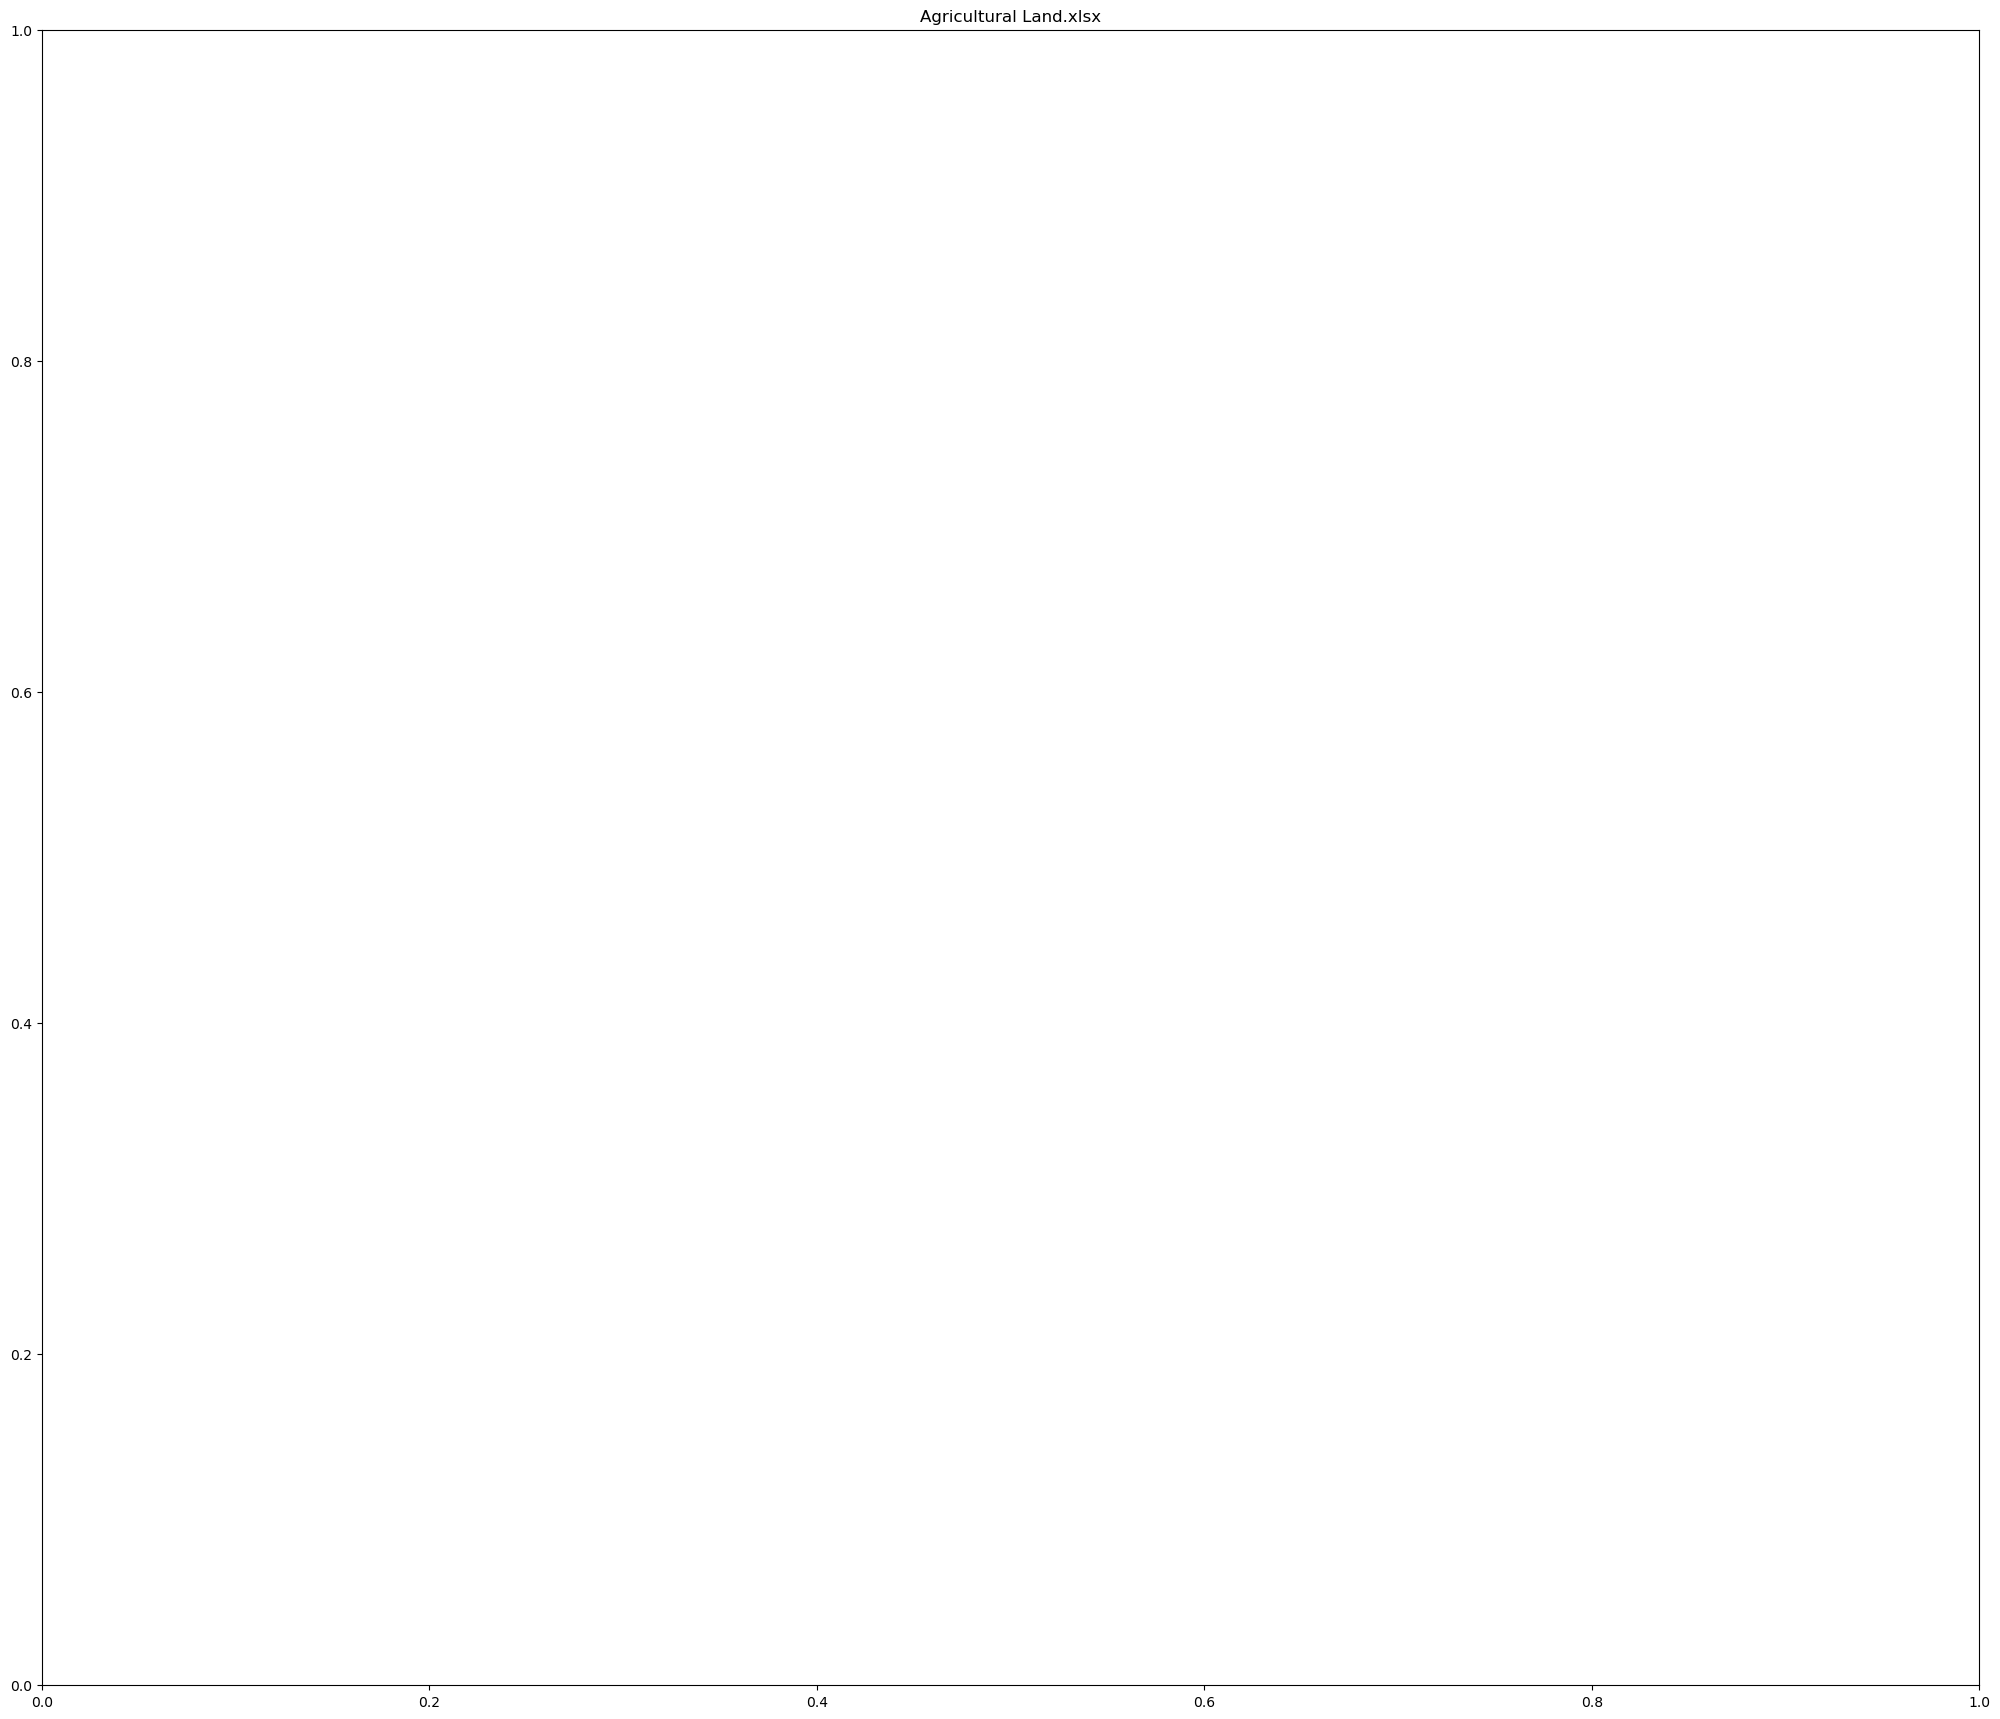

<Figure size 2500x2150 with 0 Axes>

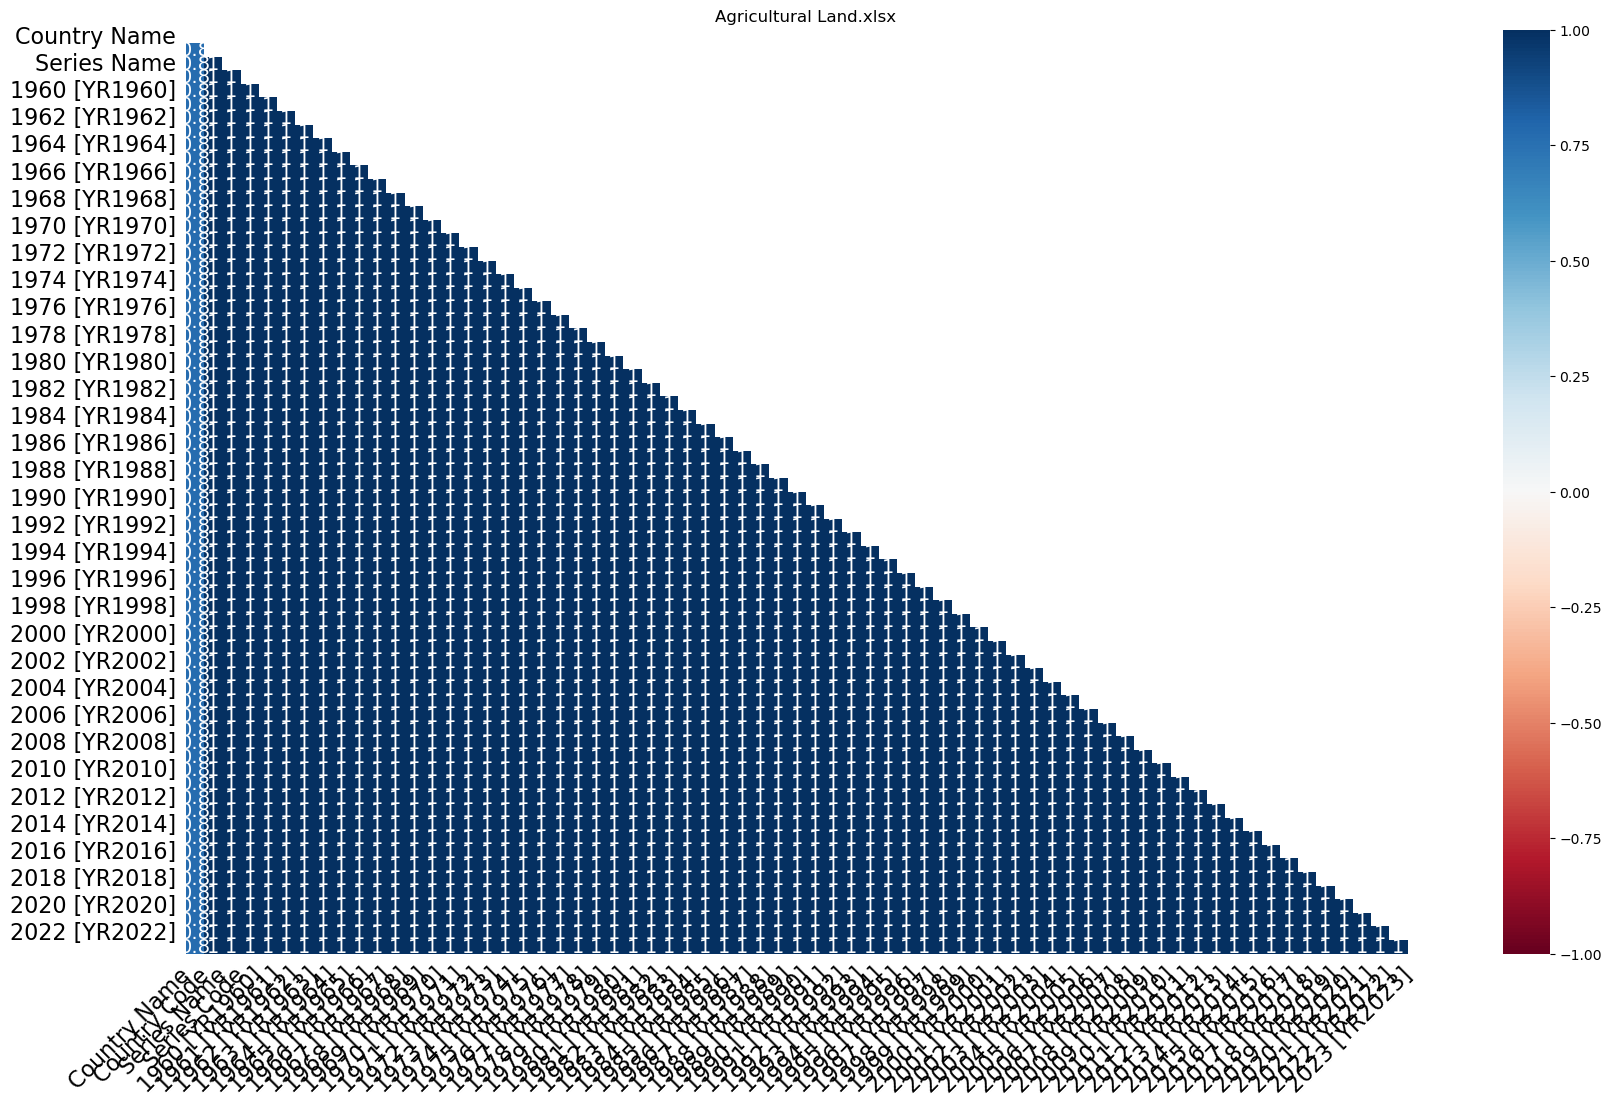

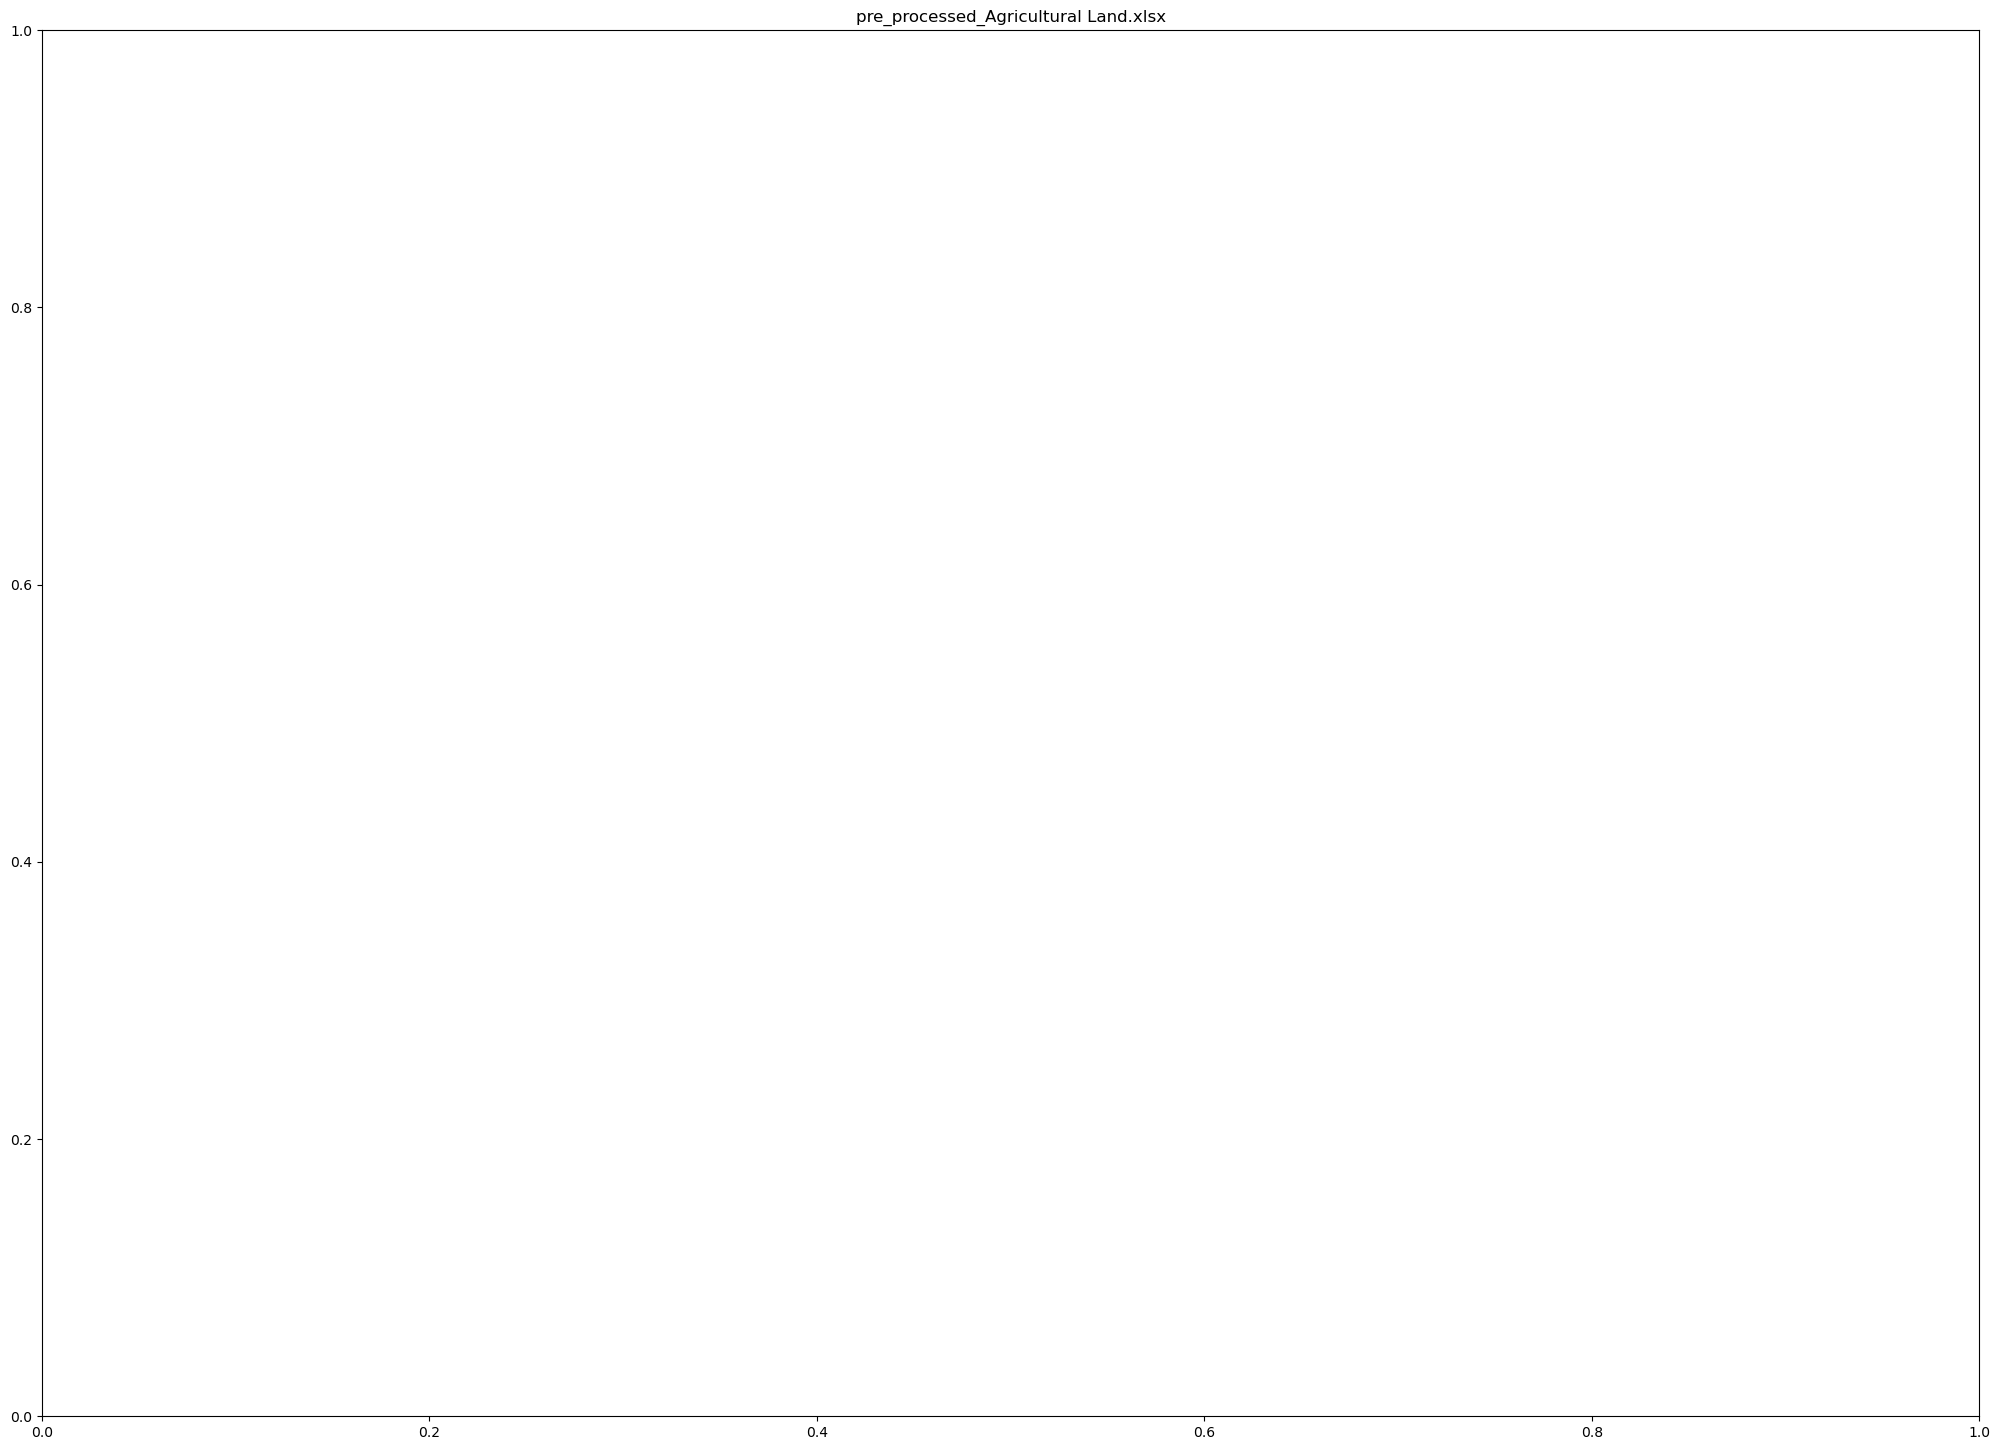

<Figure size 2500x1800 with 0 Axes>

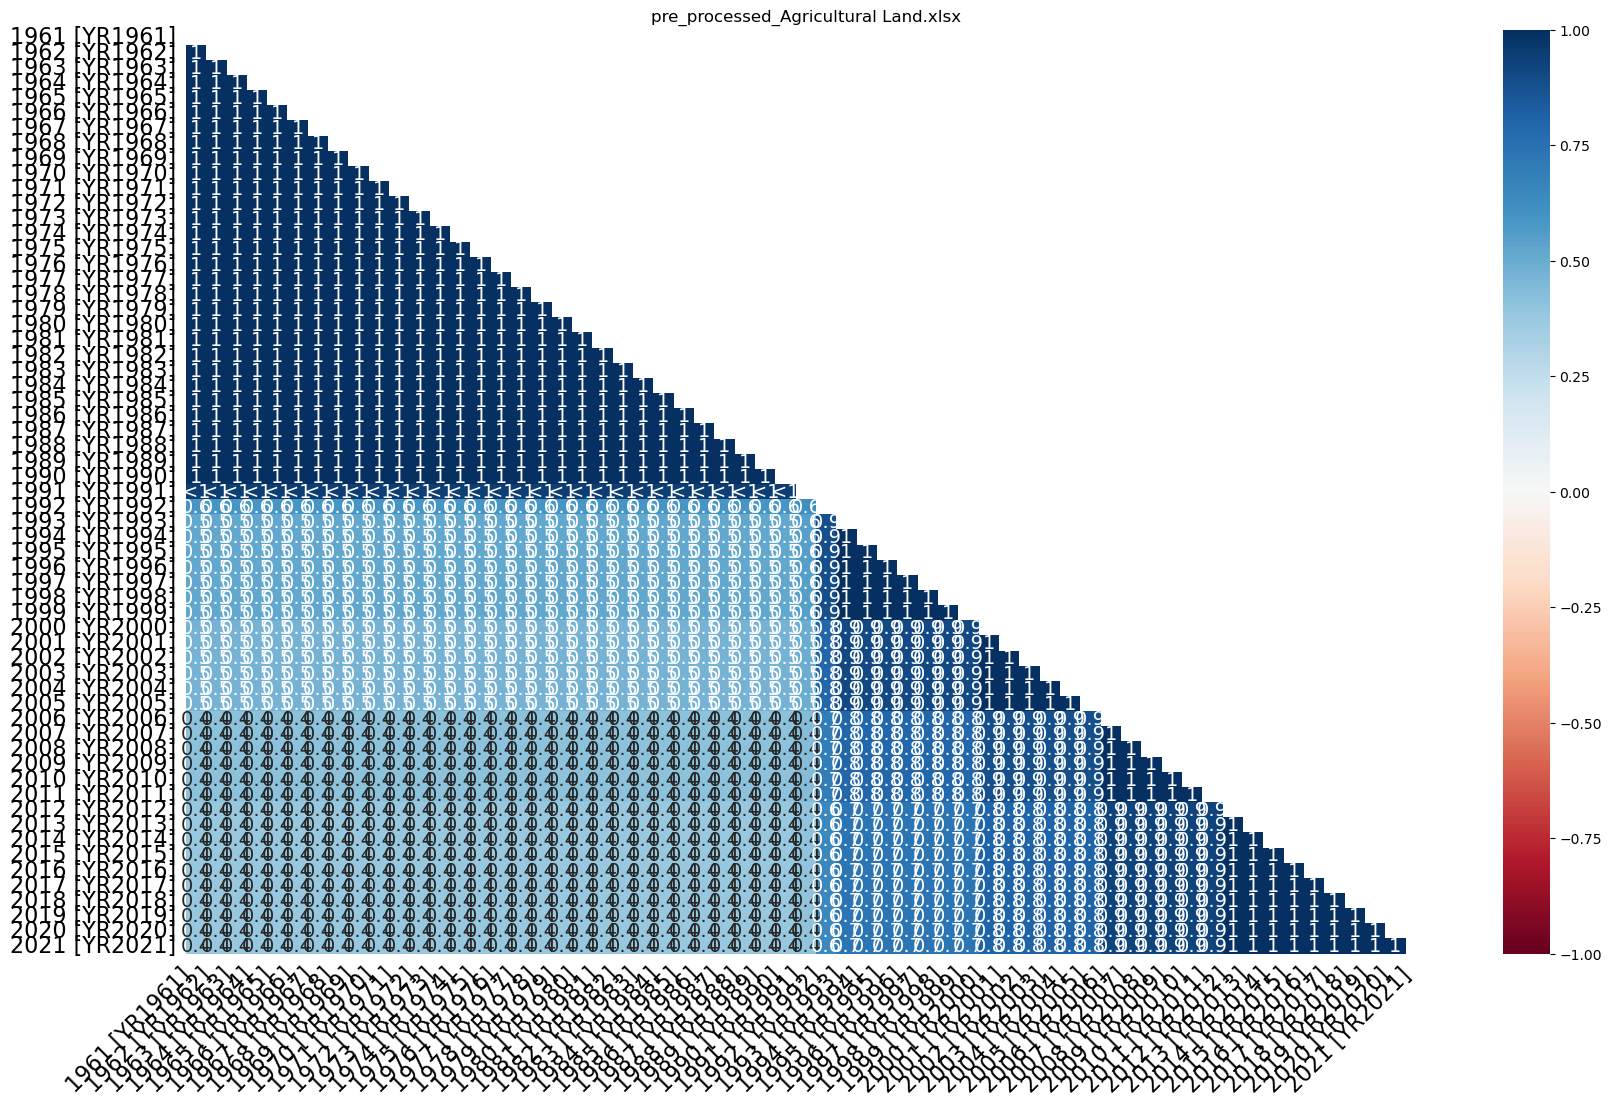

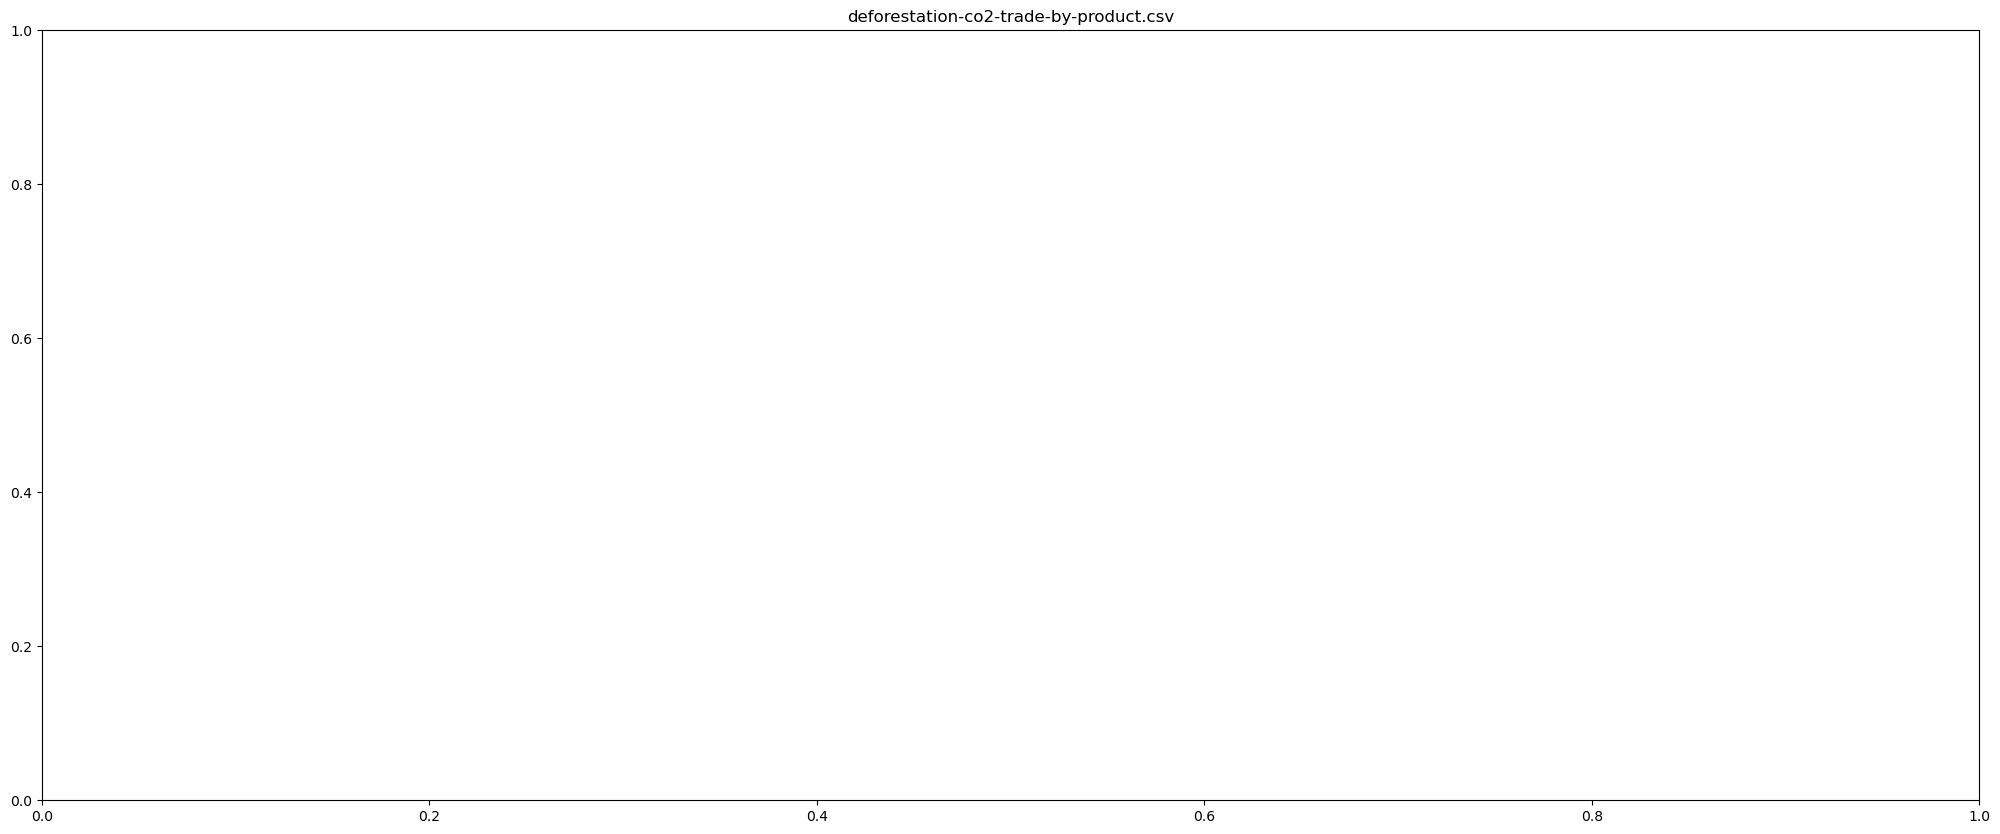

<Figure size 2500x1000 with 0 Axes>

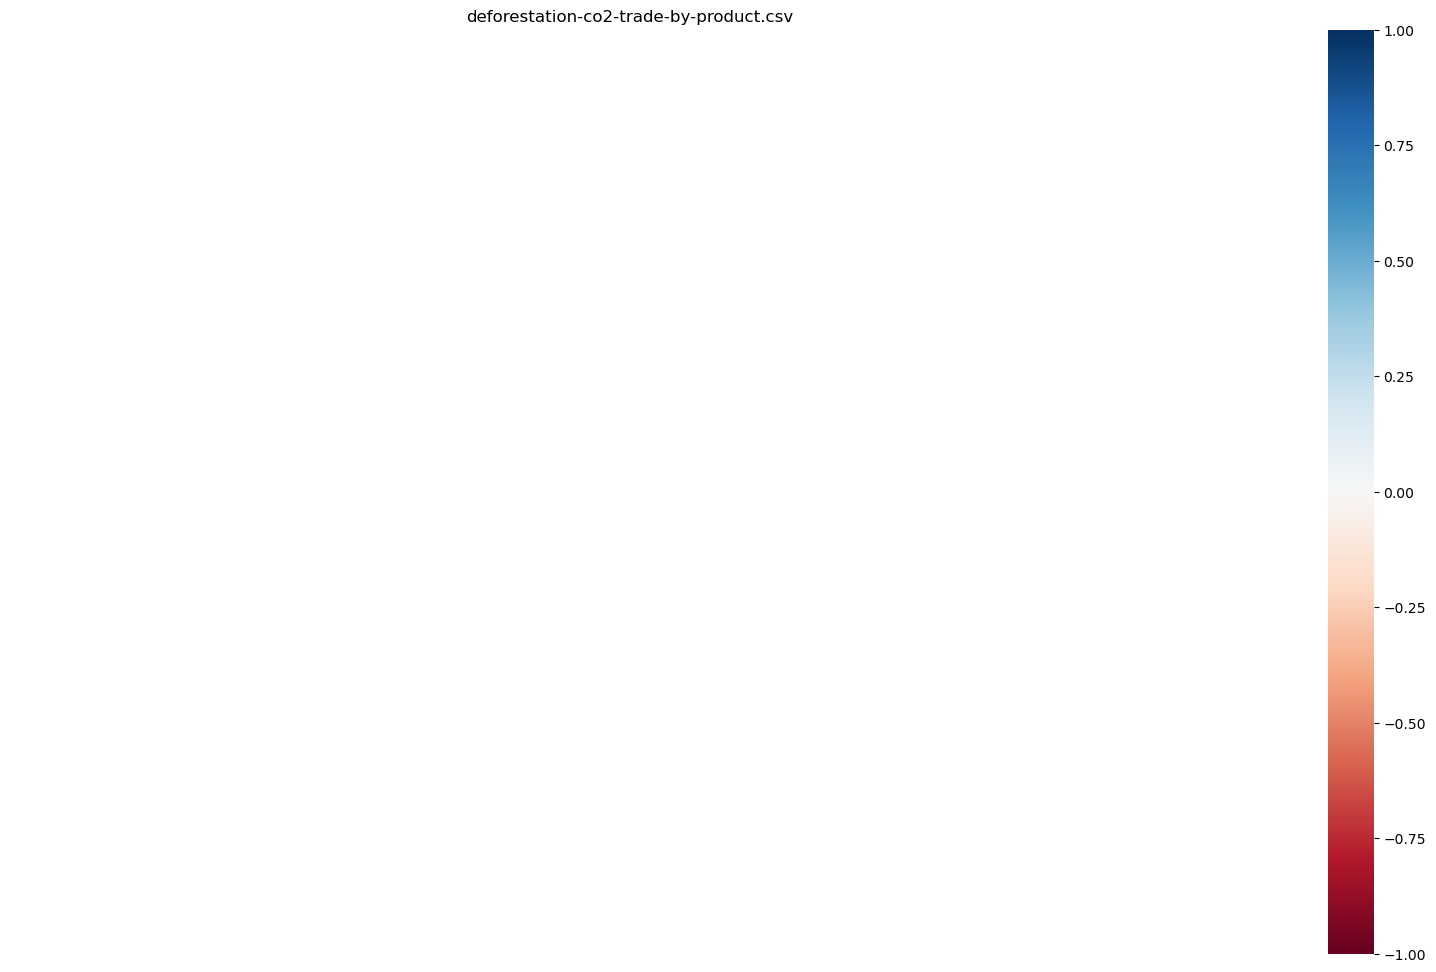

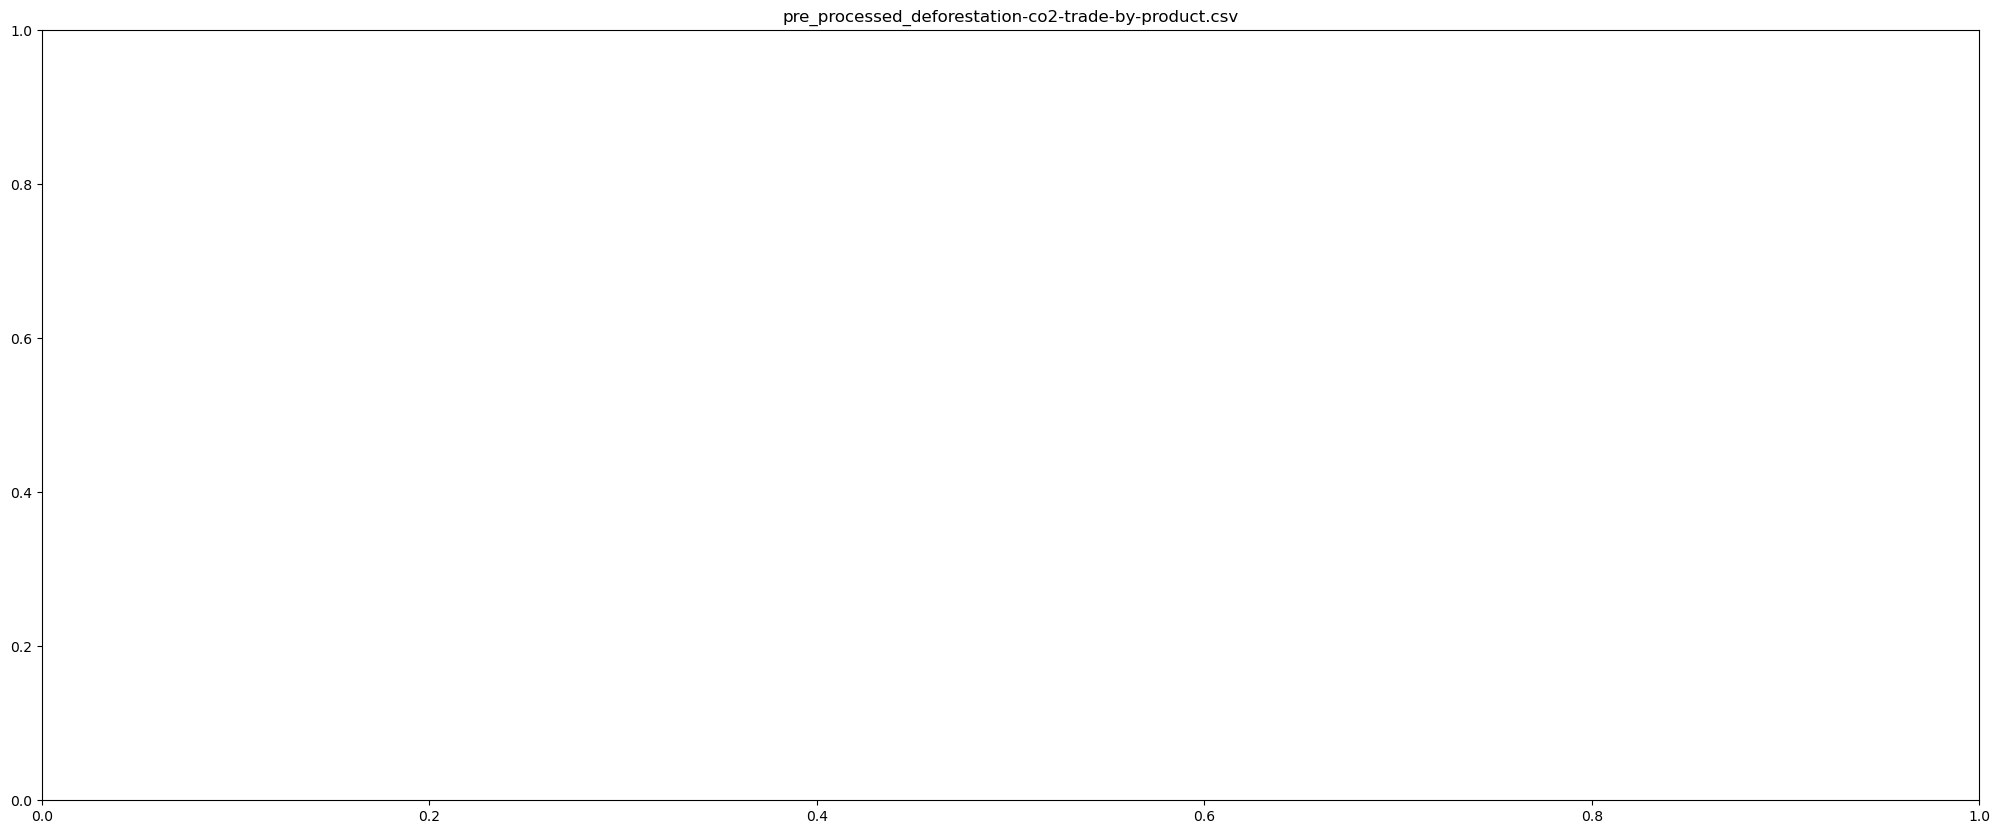

<Figure size 2500x1000 with 0 Axes>

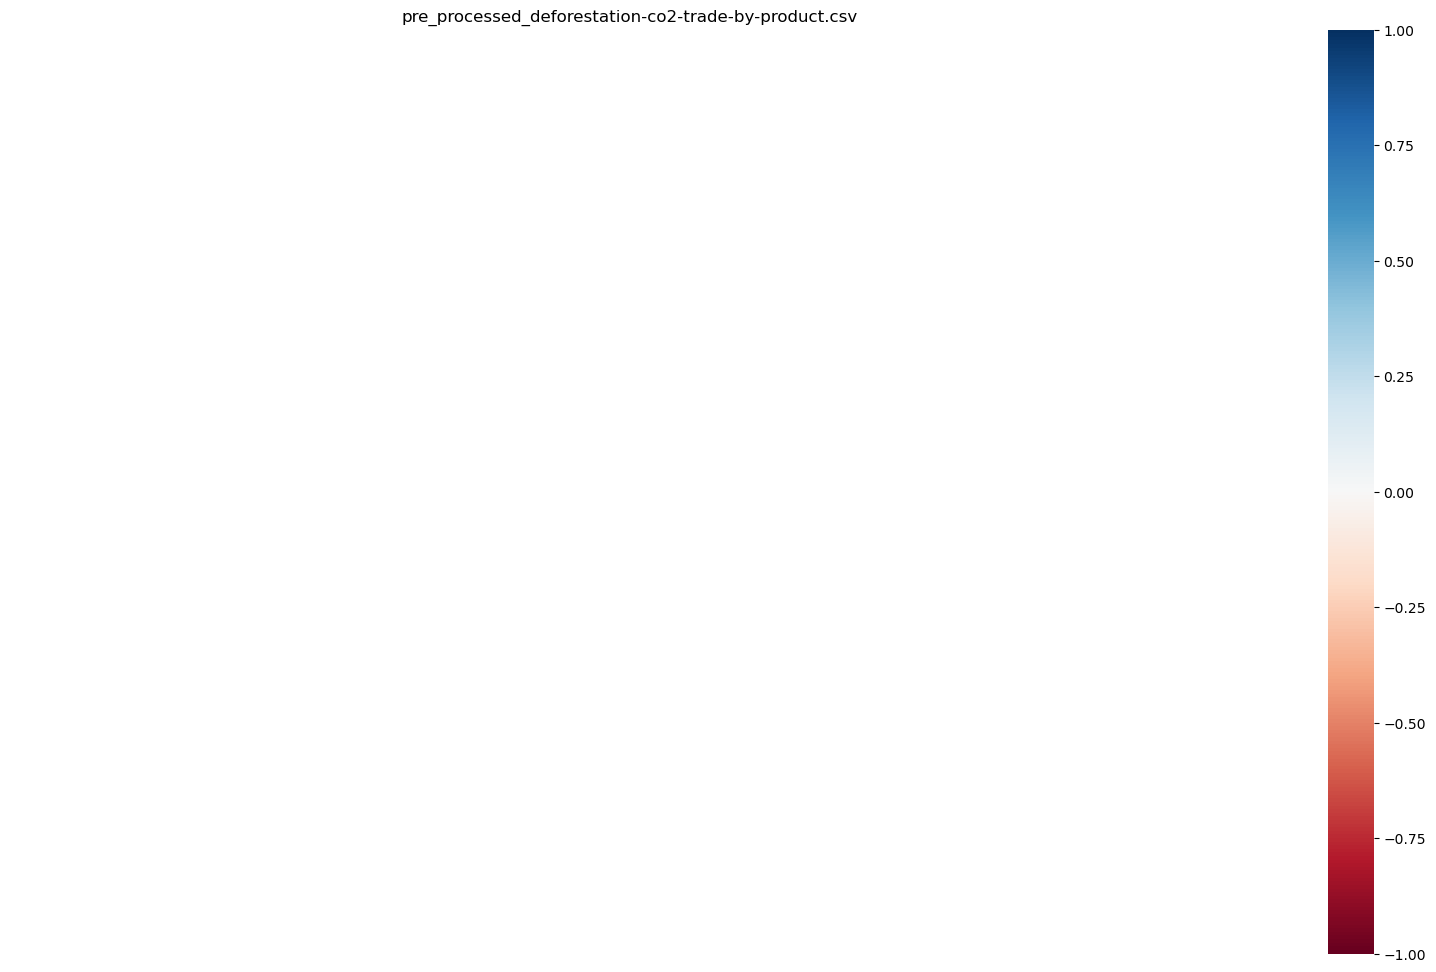

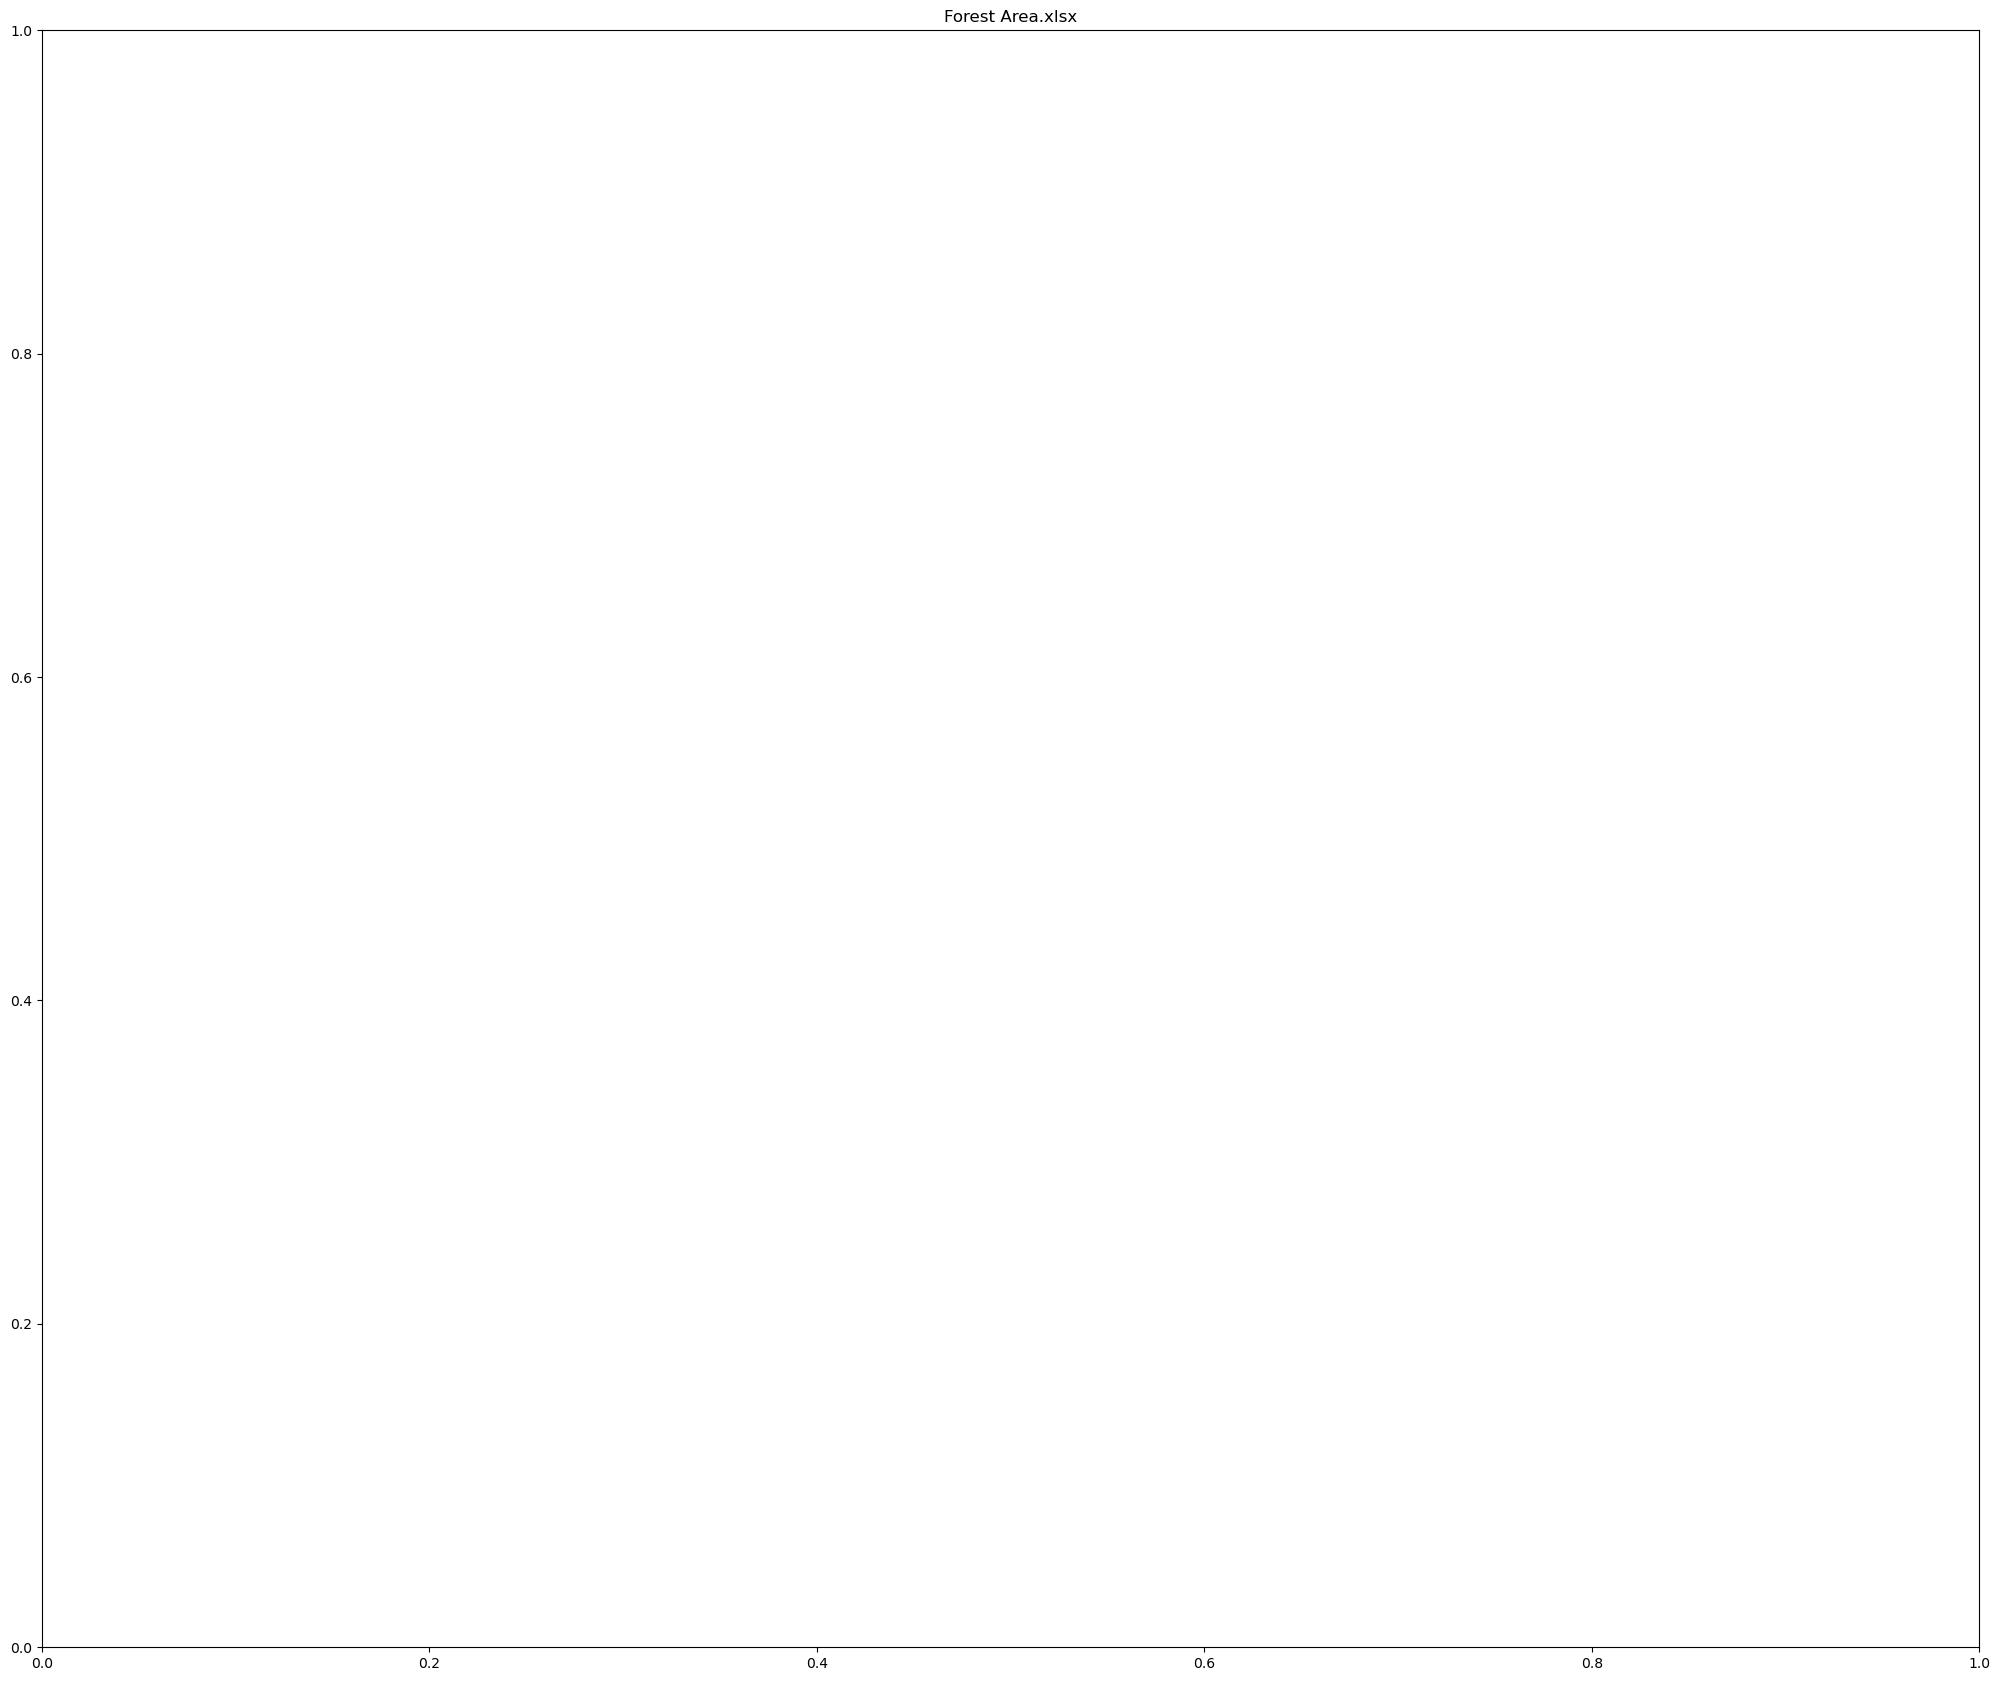

<Figure size 2500x2100 with 0 Axes>

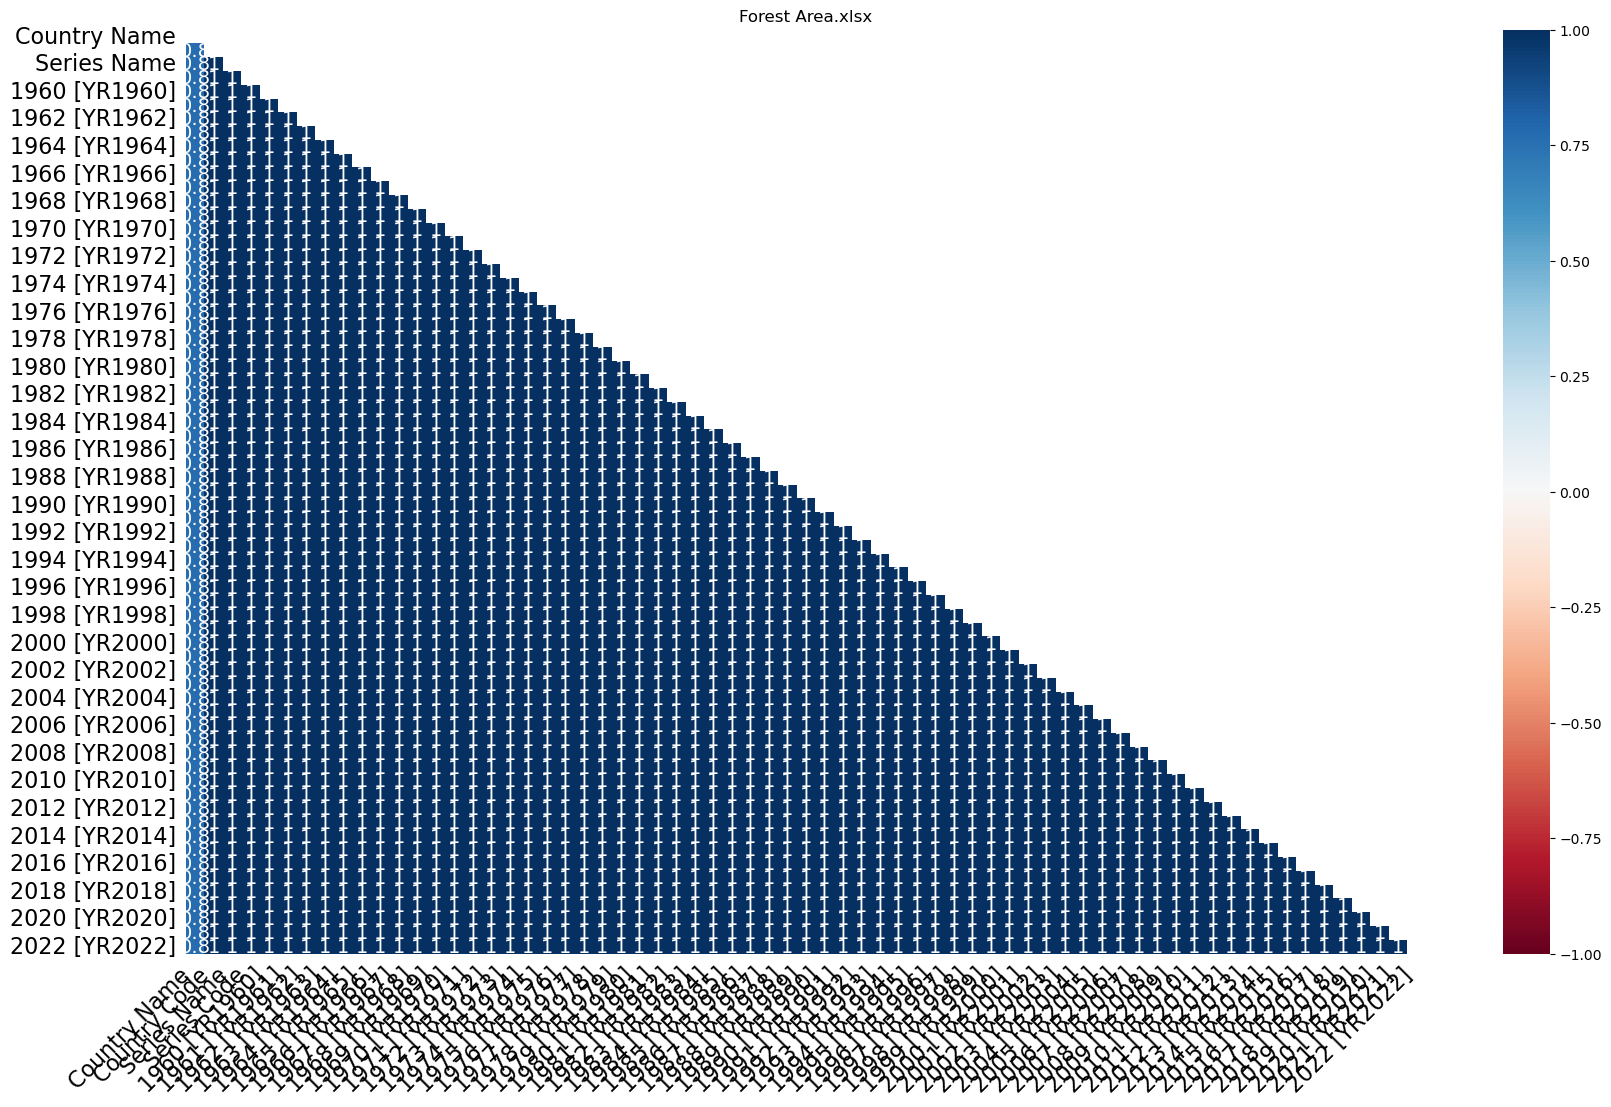

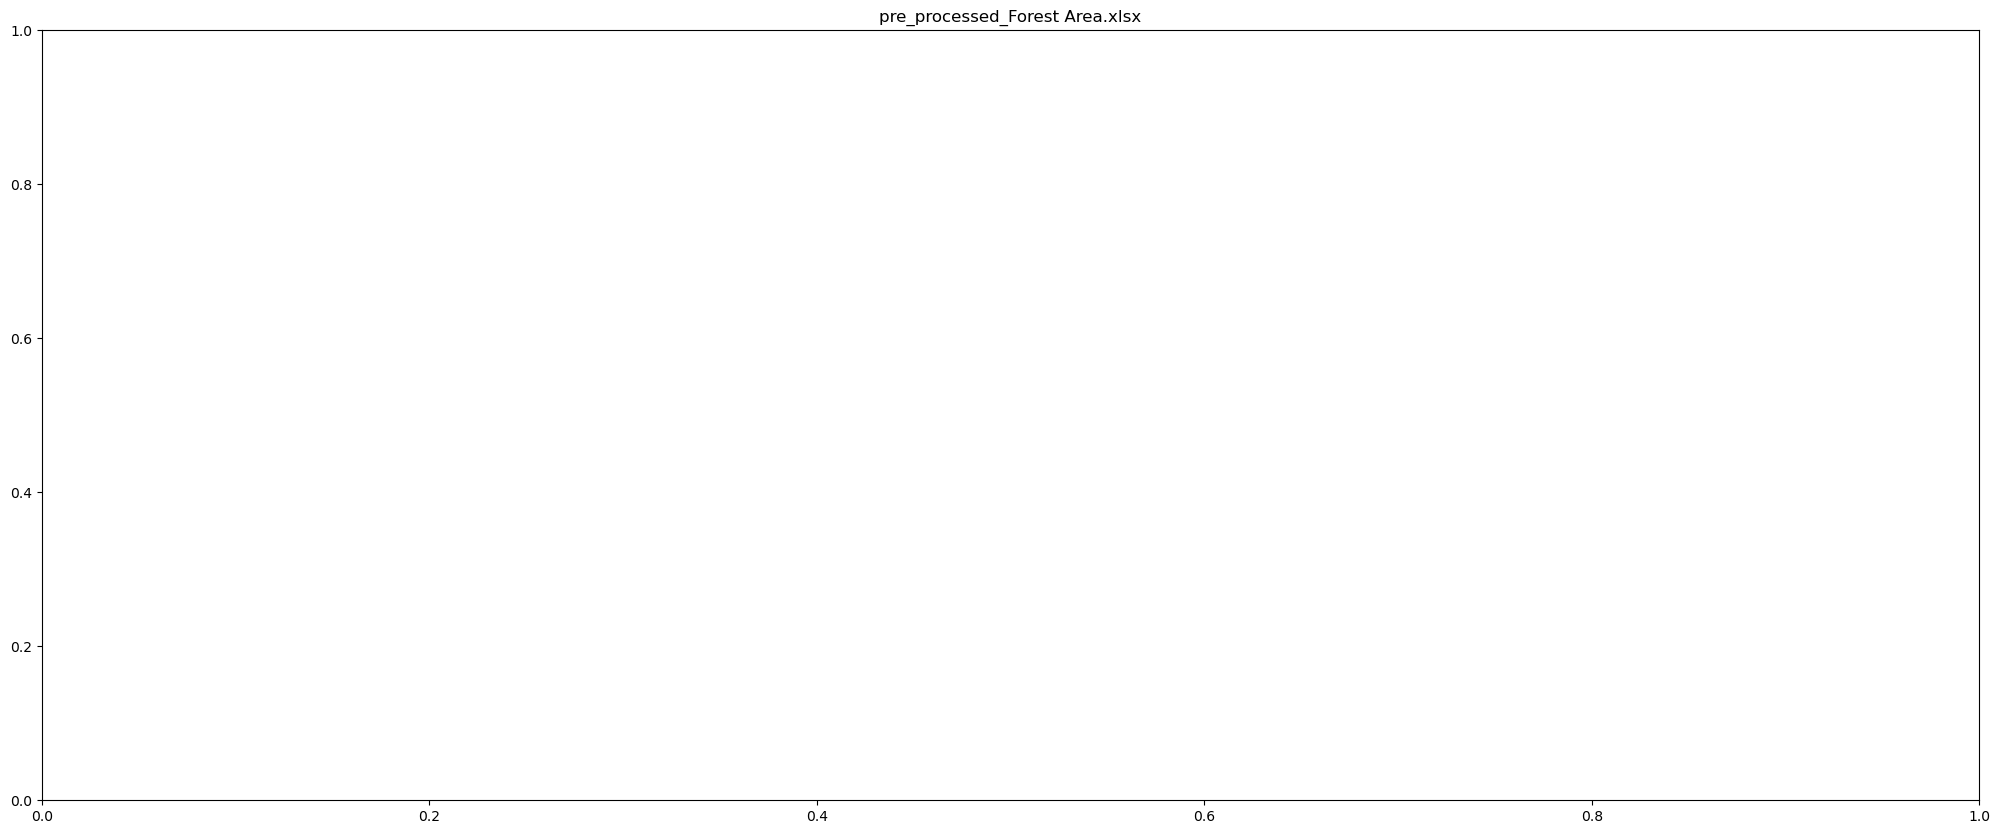

<Figure size 2500x1000 with 0 Axes>

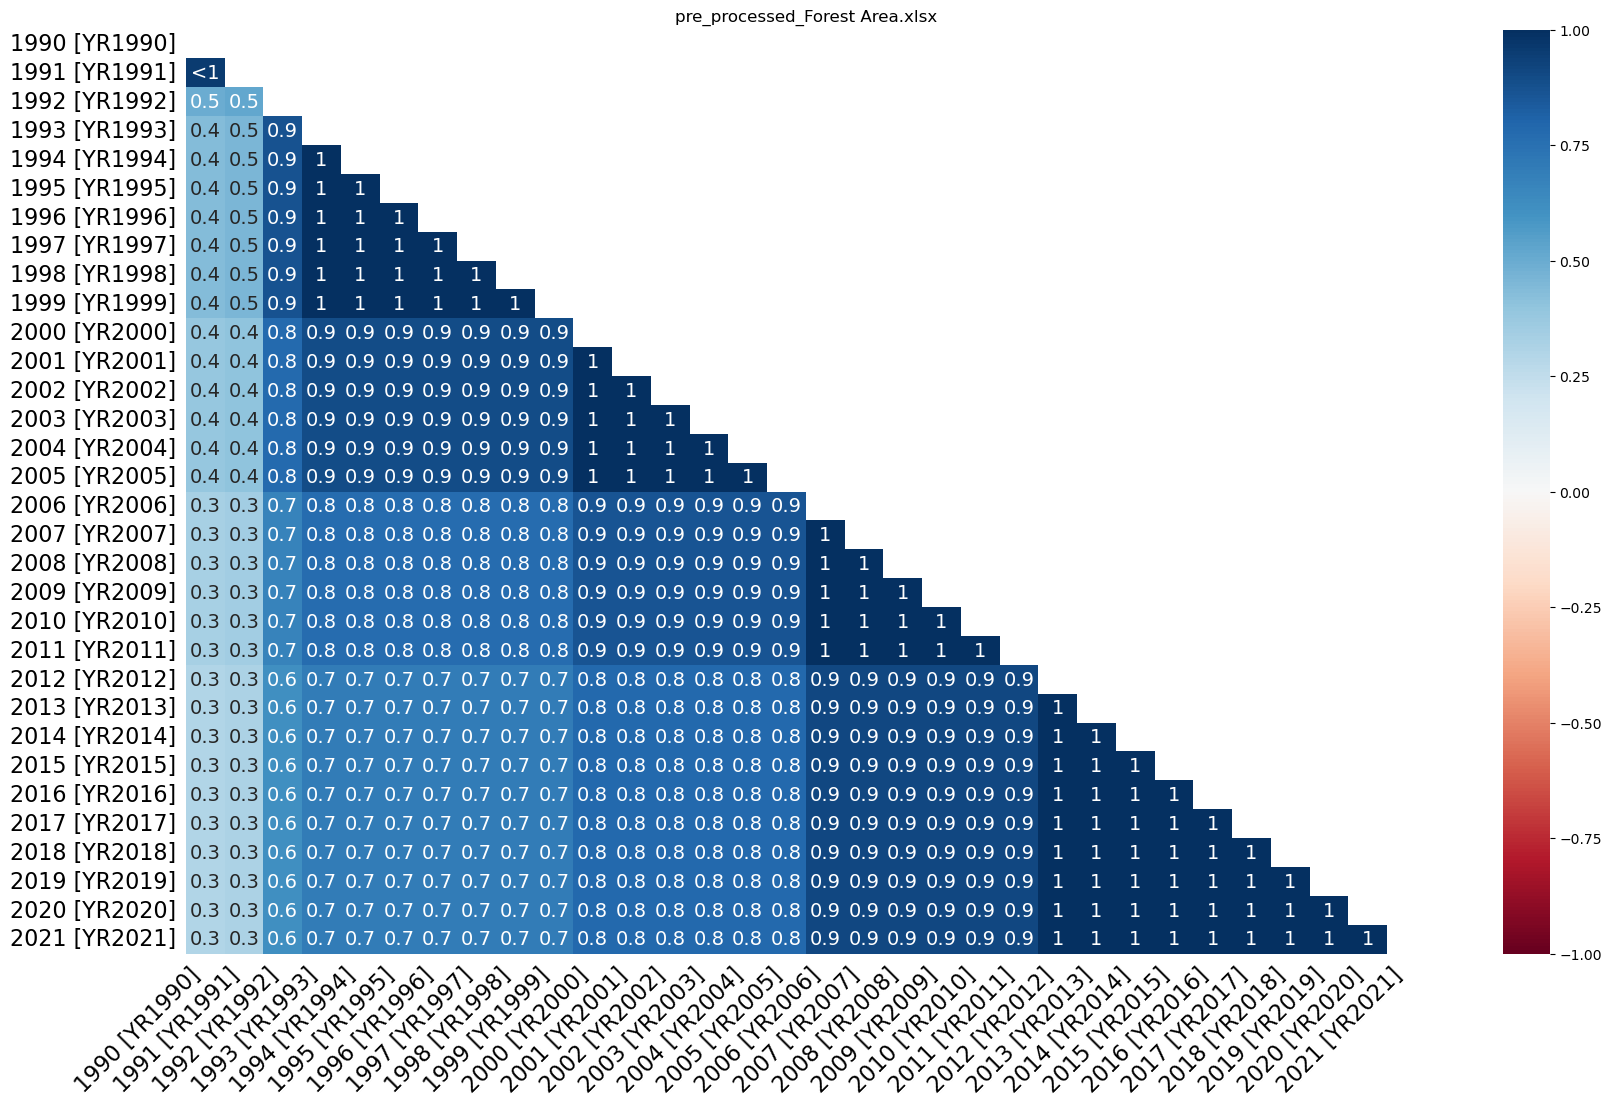

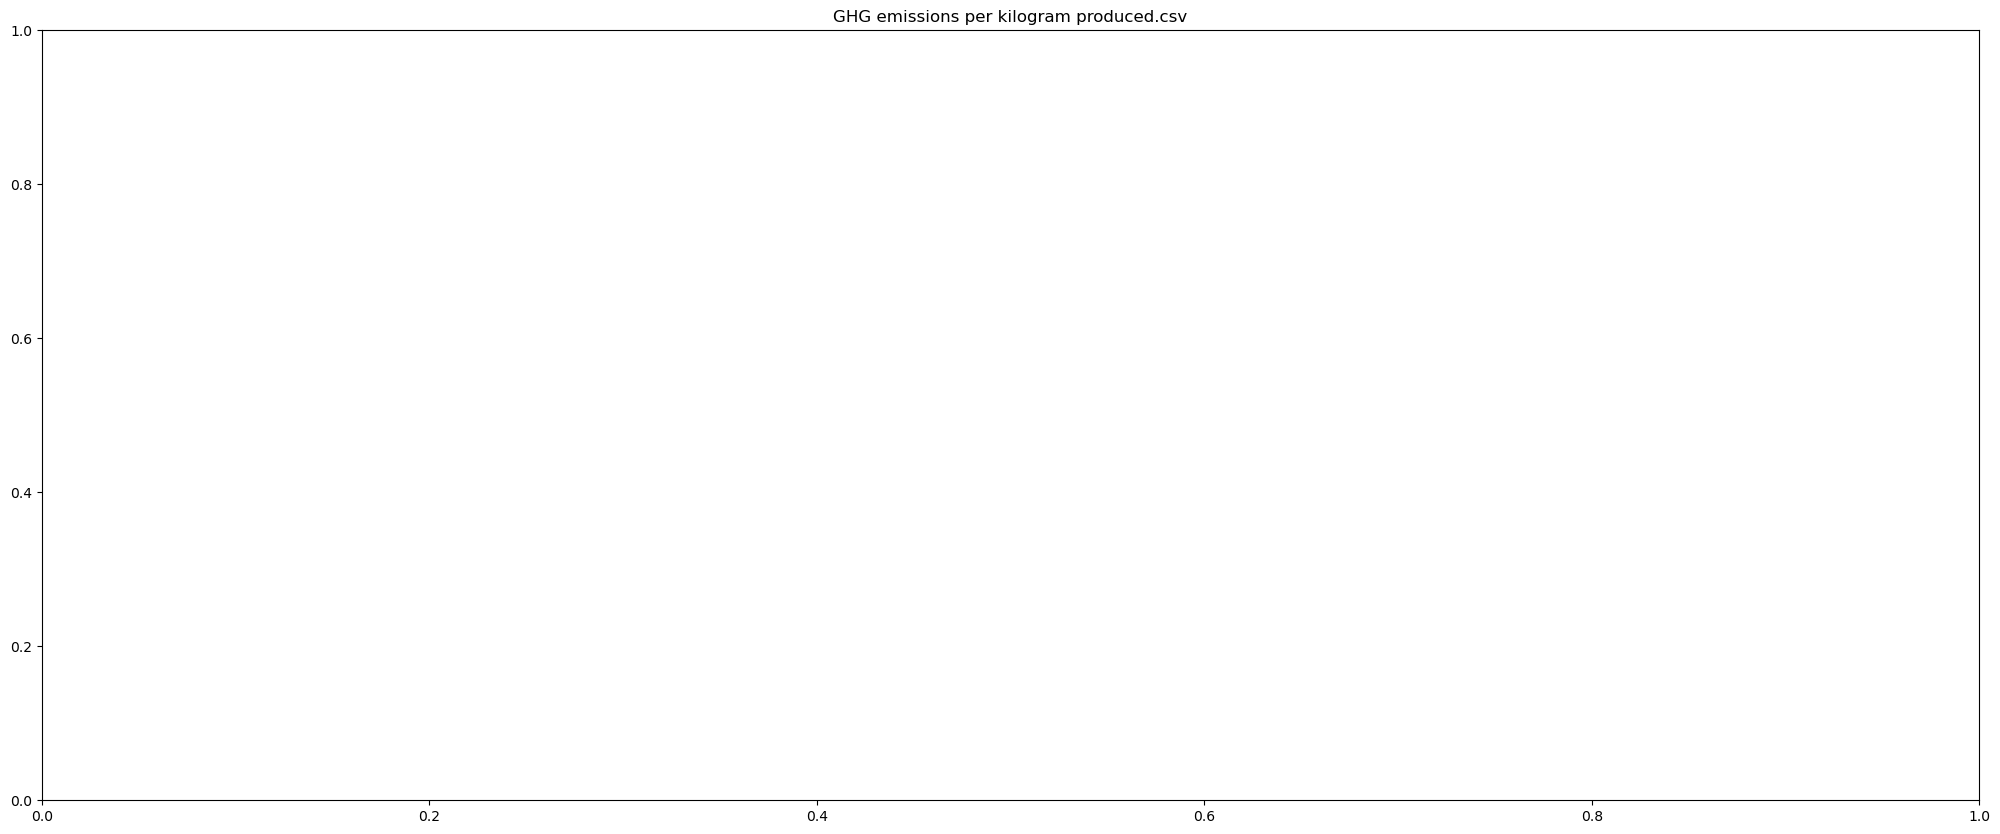

<Figure size 2500x1000 with 0 Axes>

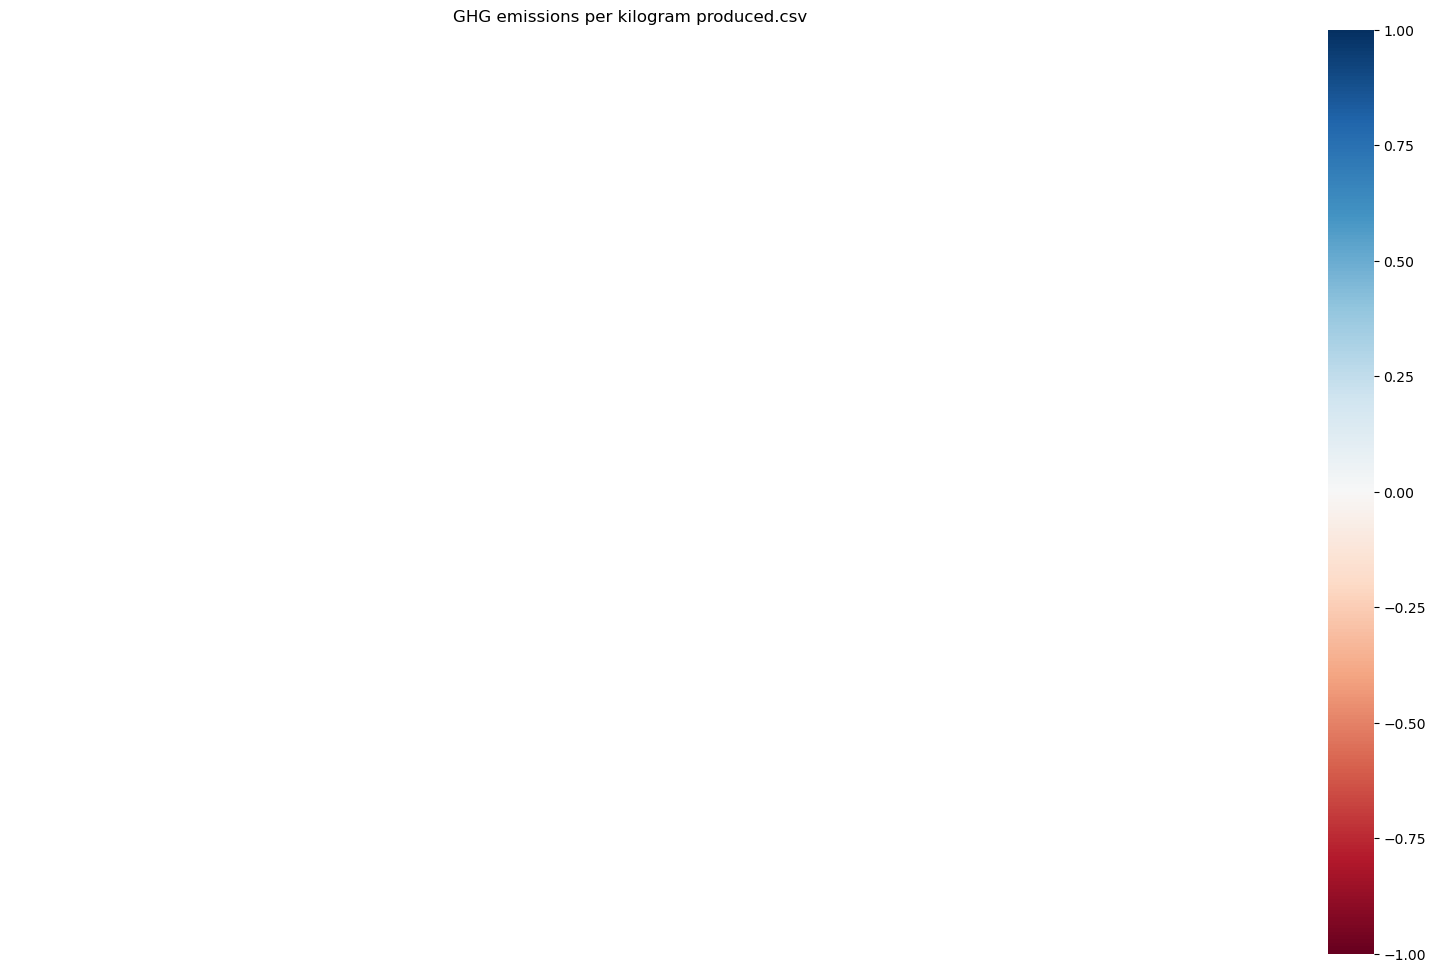

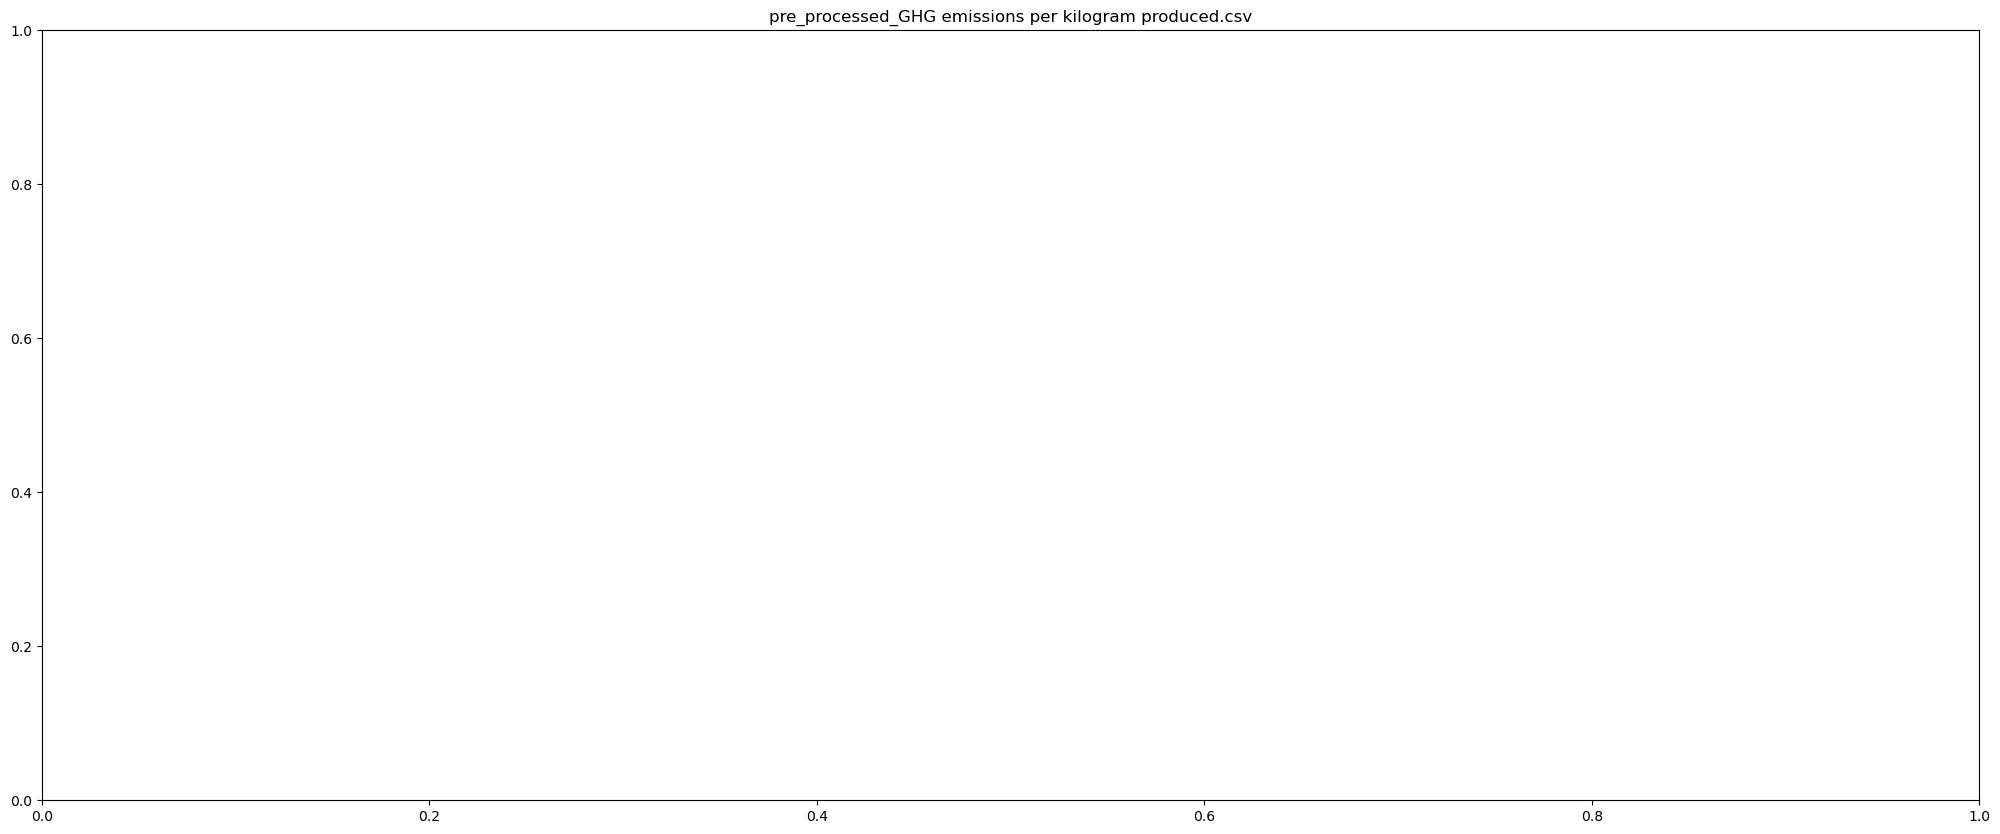

<Figure size 2500x1000 with 0 Axes>

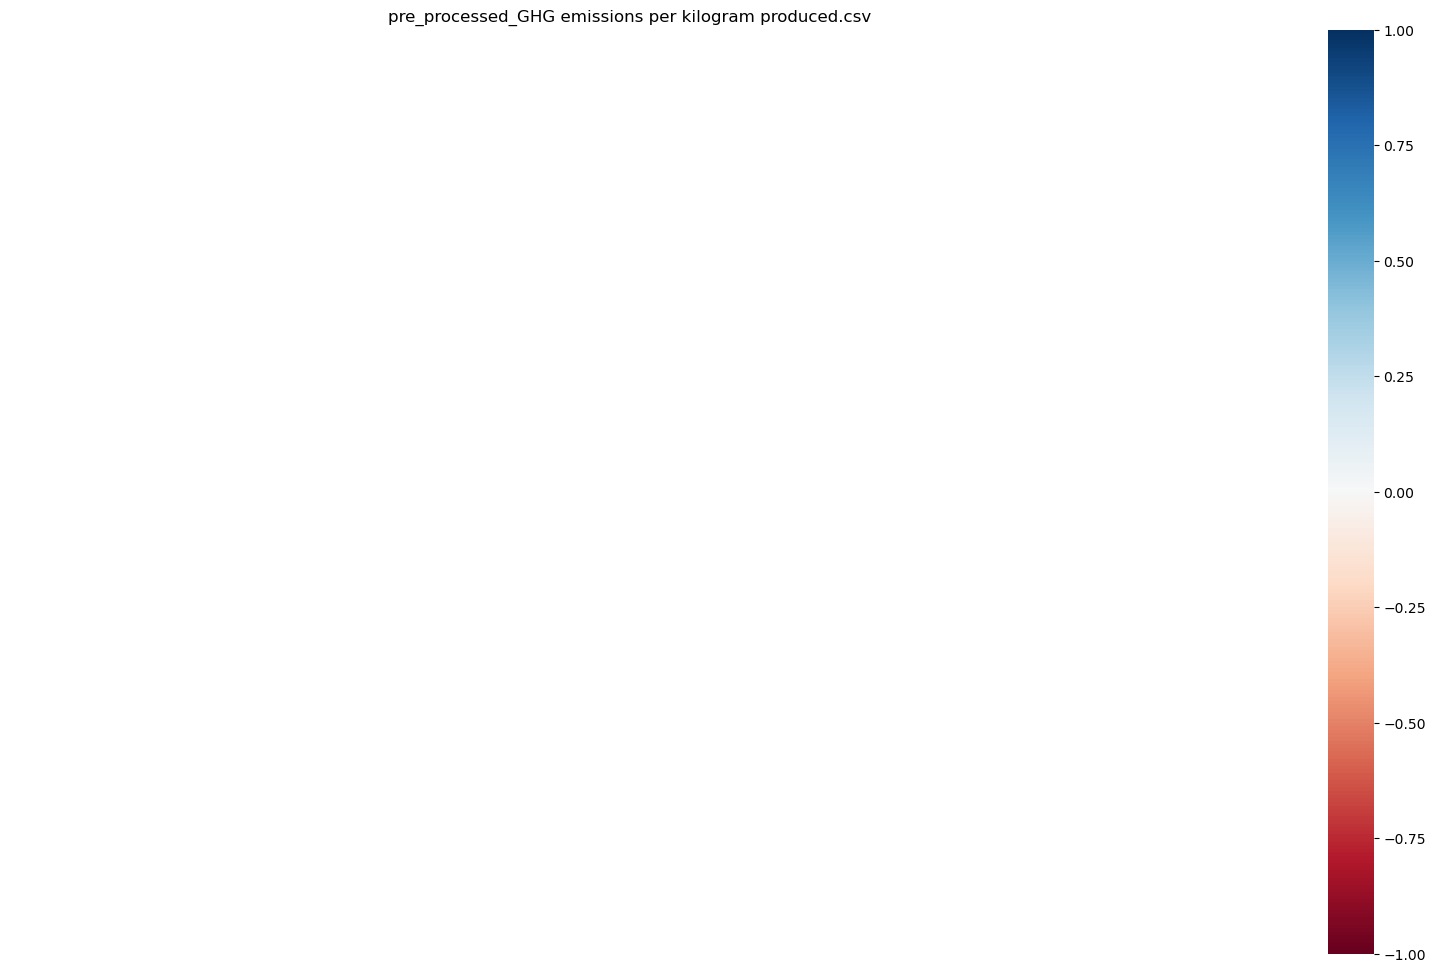

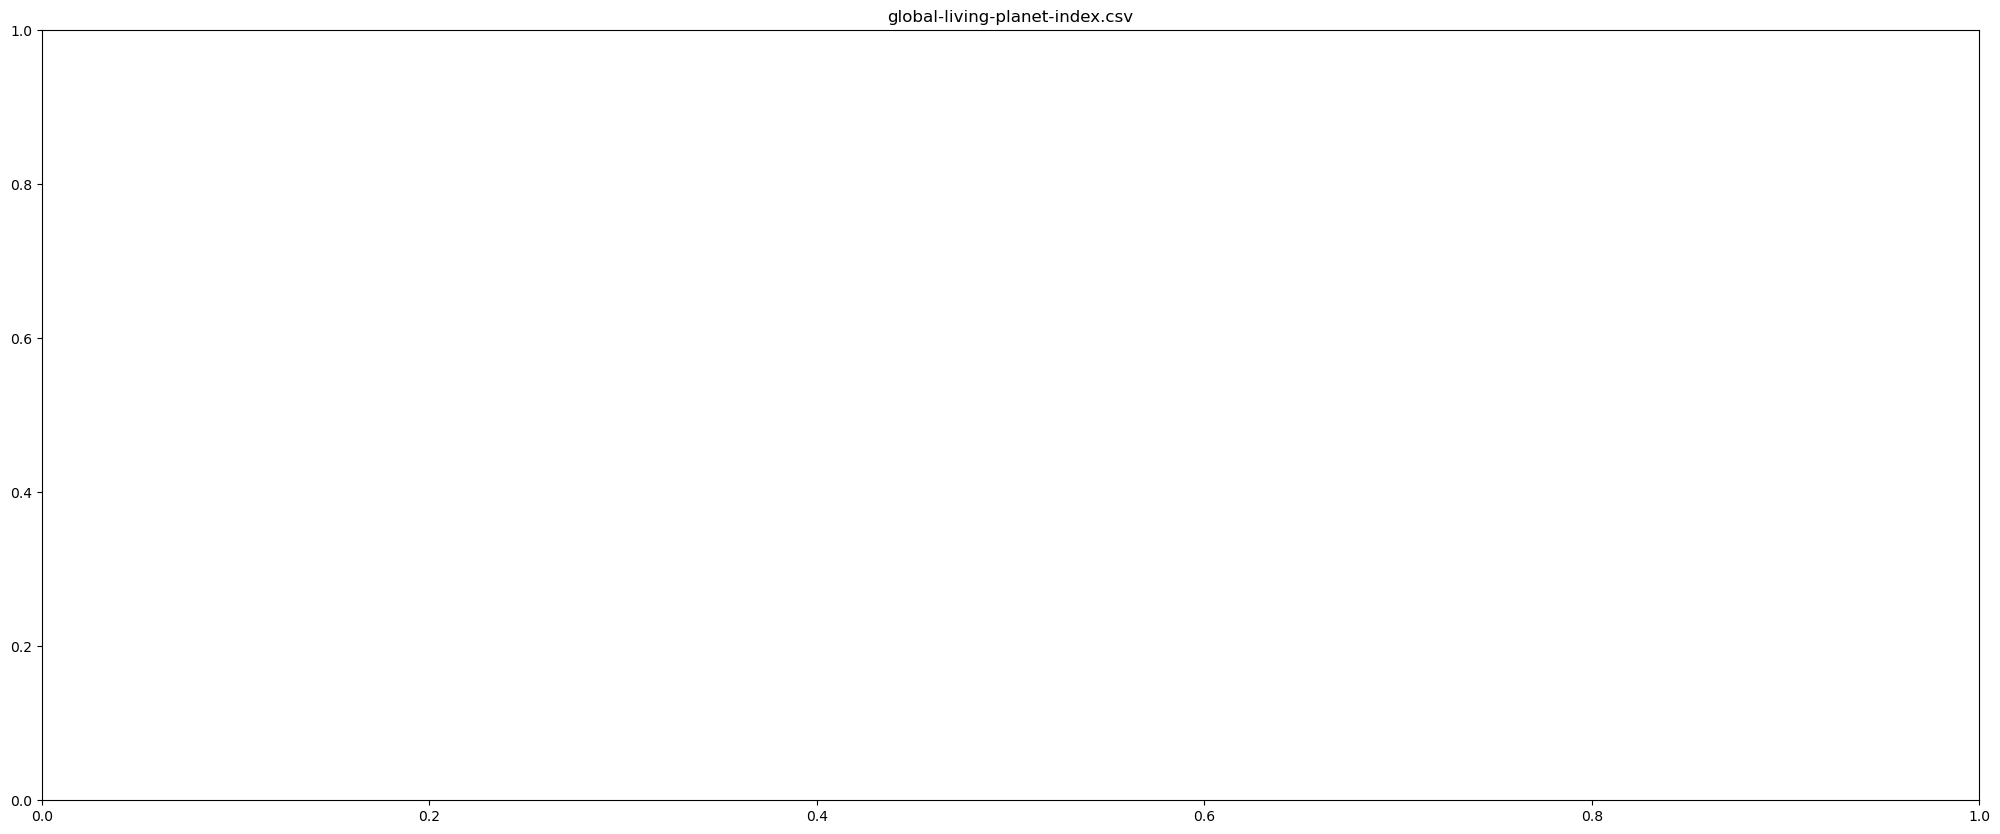

<Figure size 2500x1000 with 0 Axes>

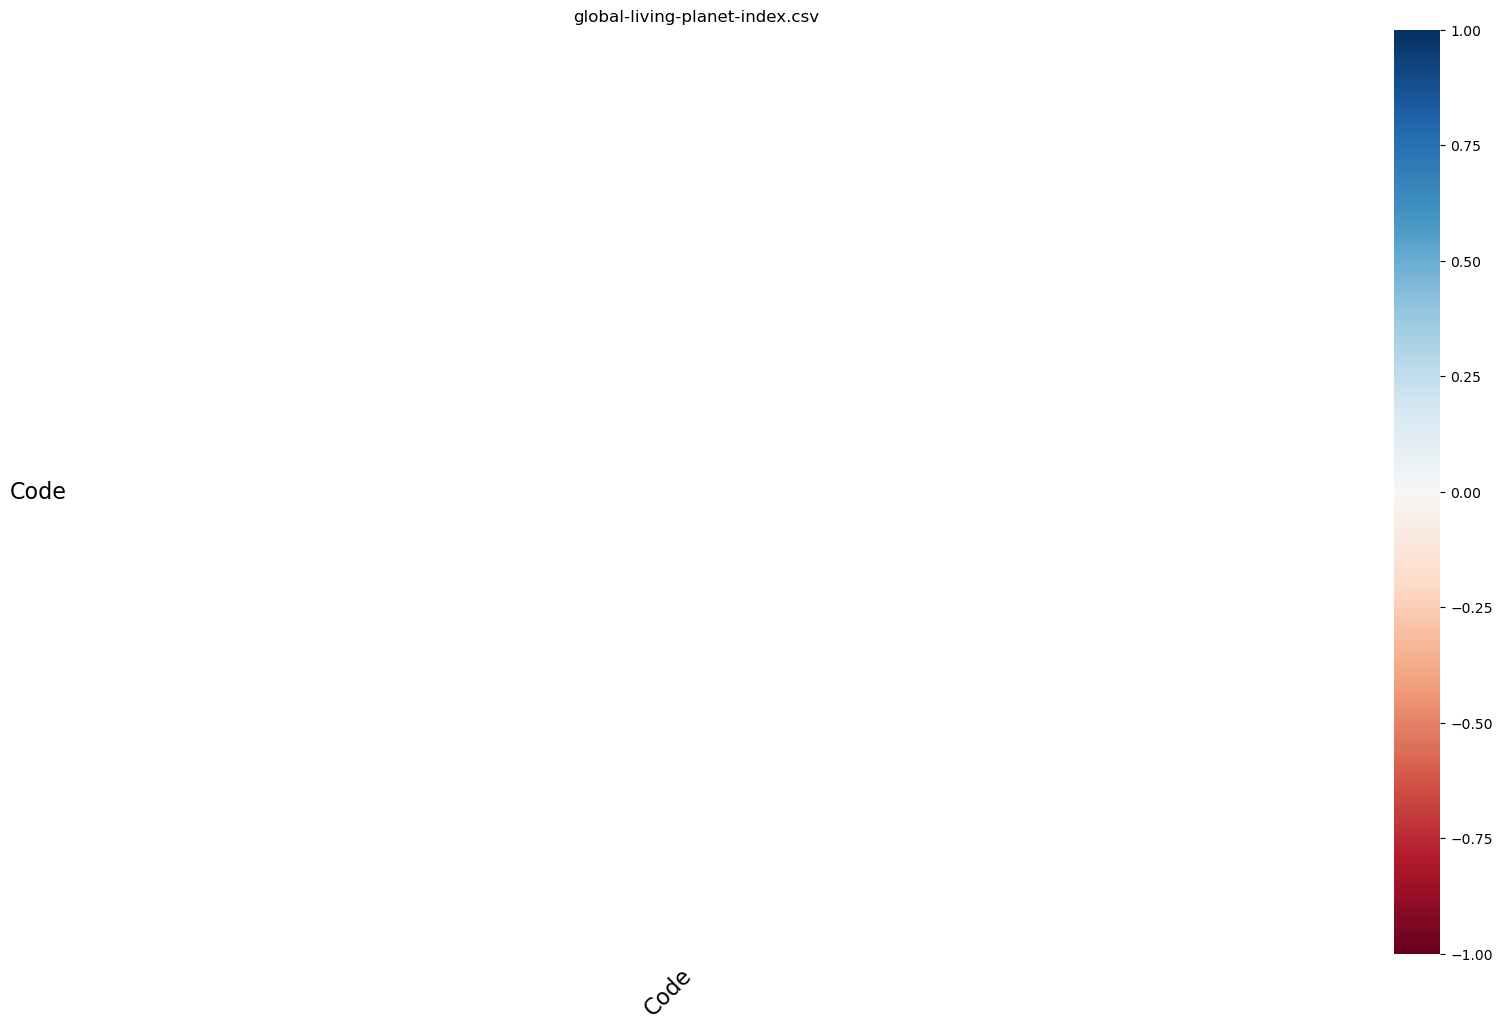

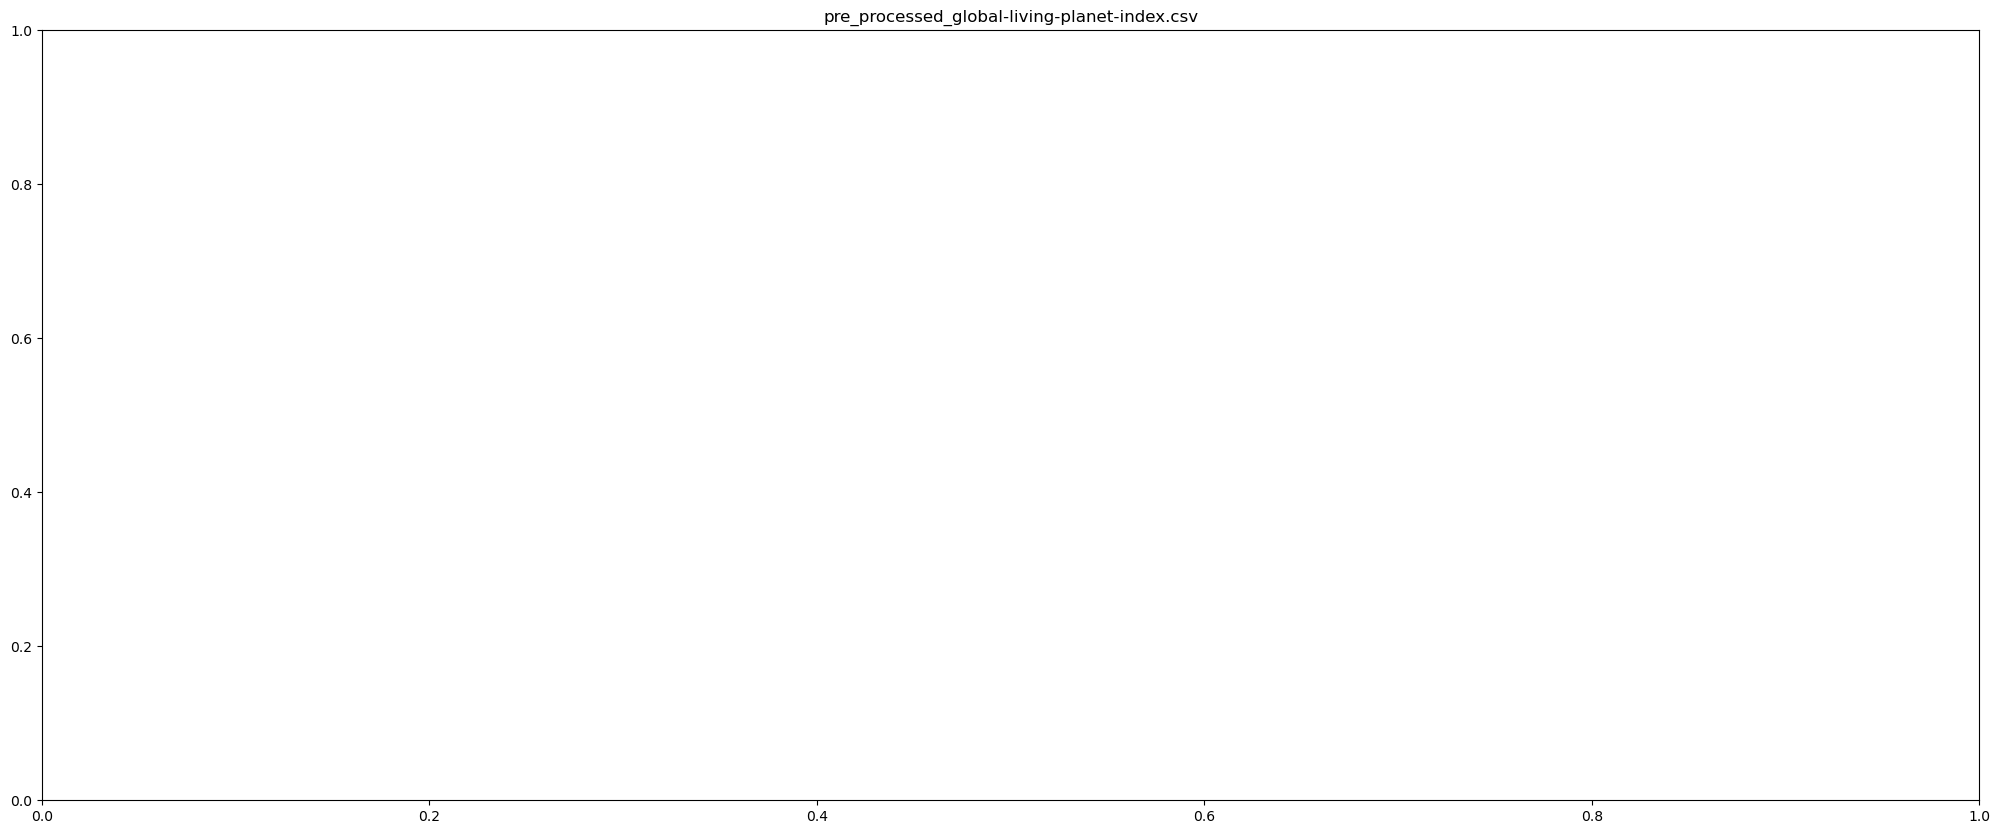

<Figure size 2500x1000 with 0 Axes>

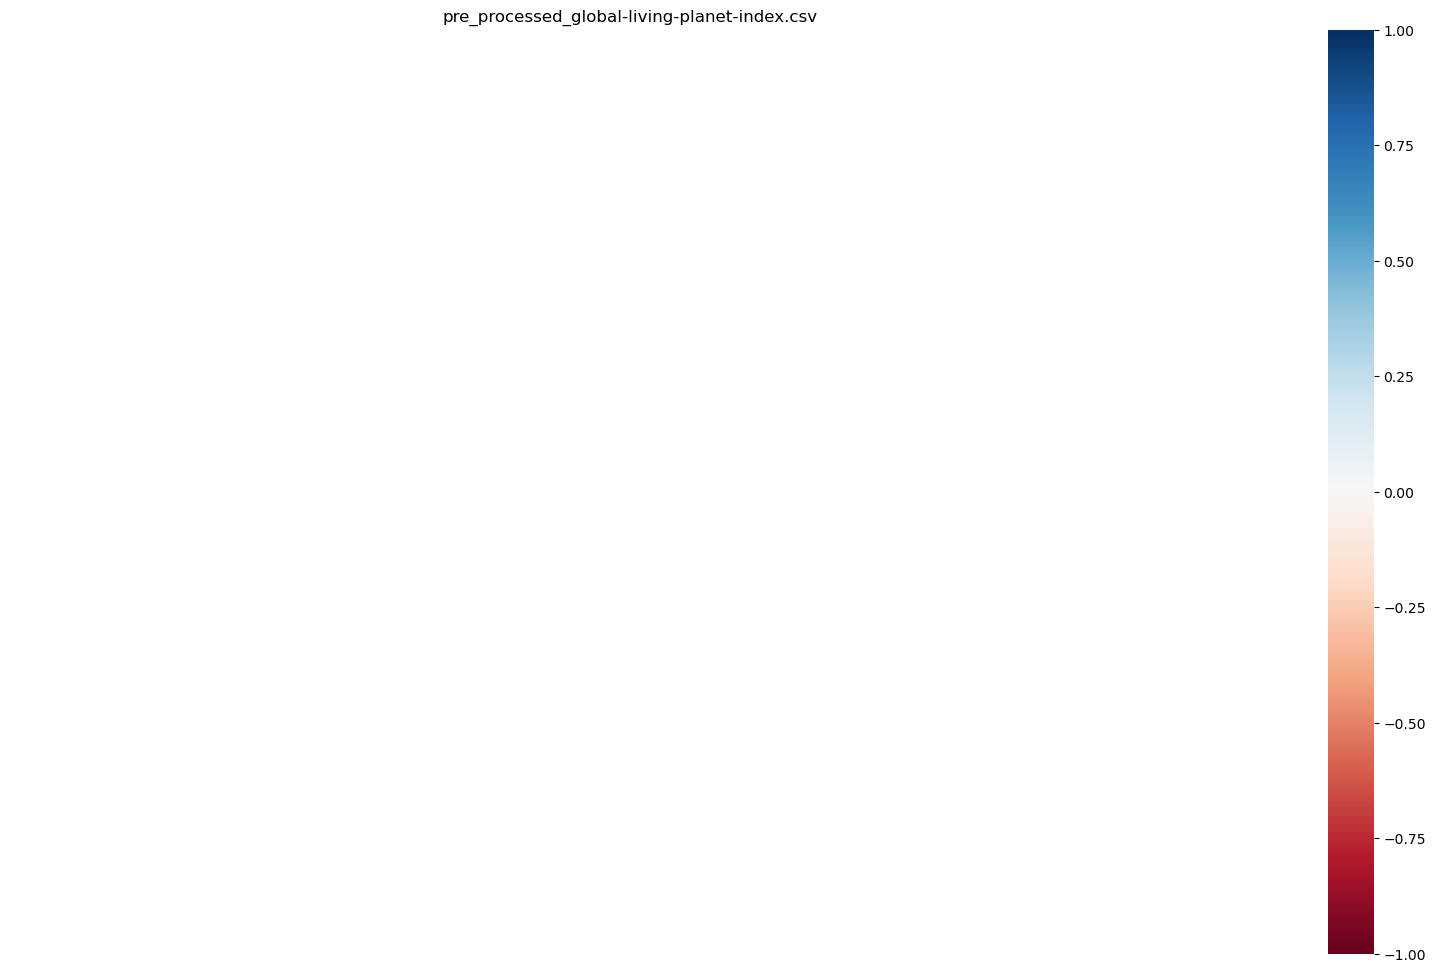

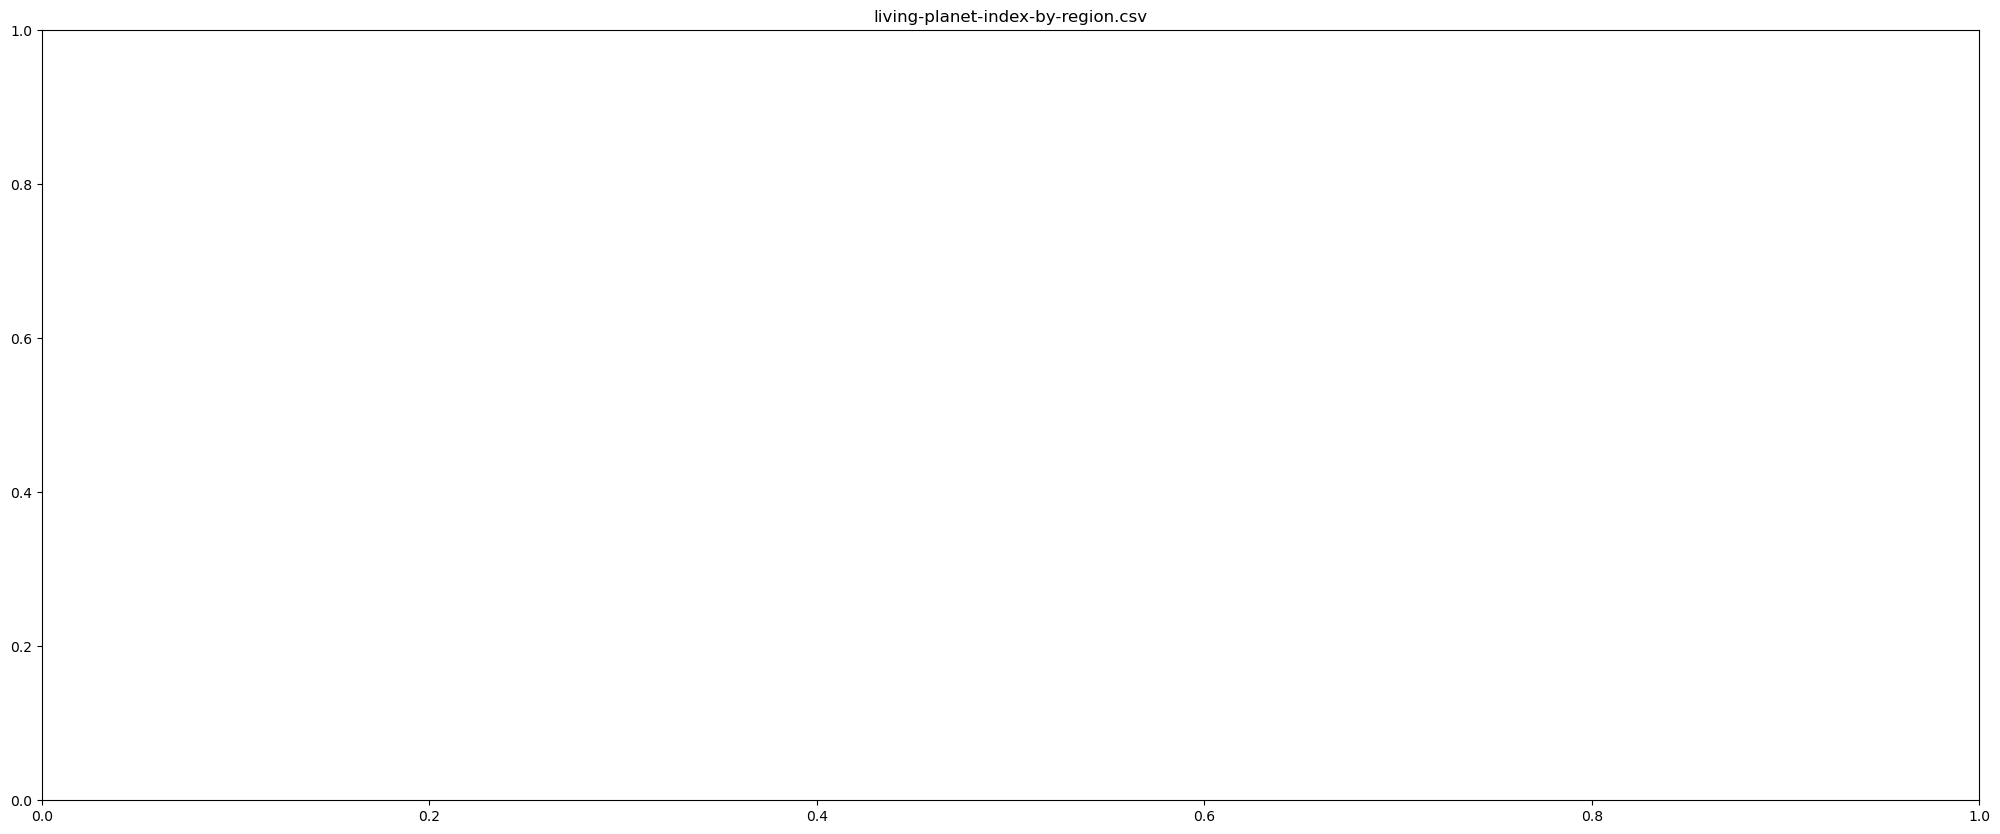

<Figure size 2500x1000 with 0 Axes>

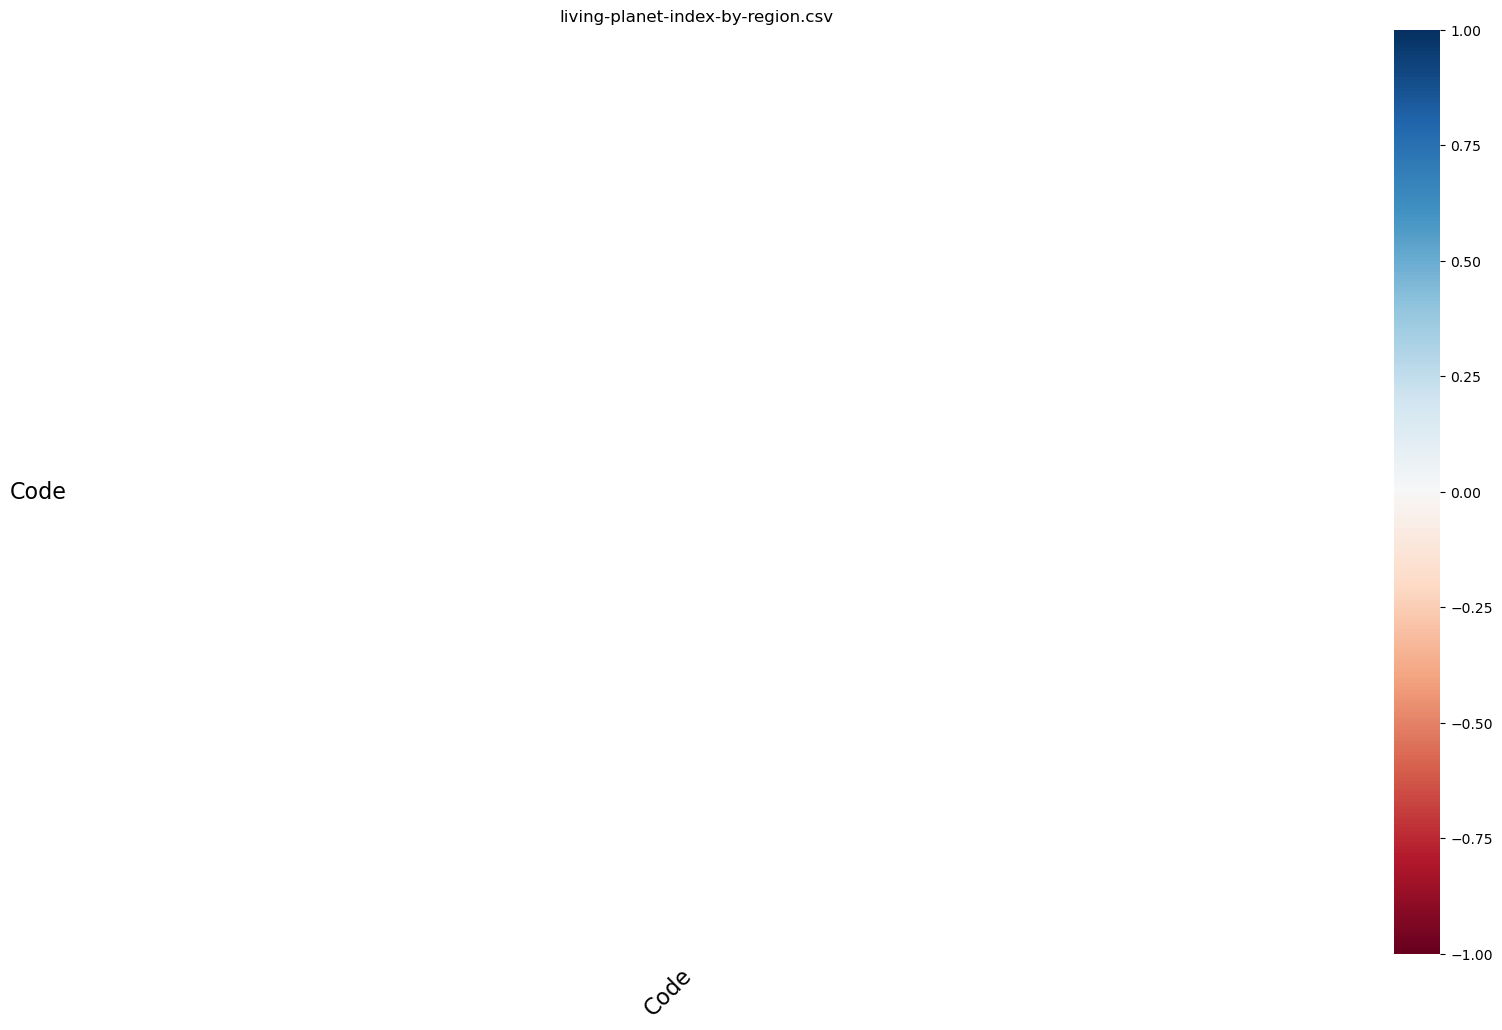

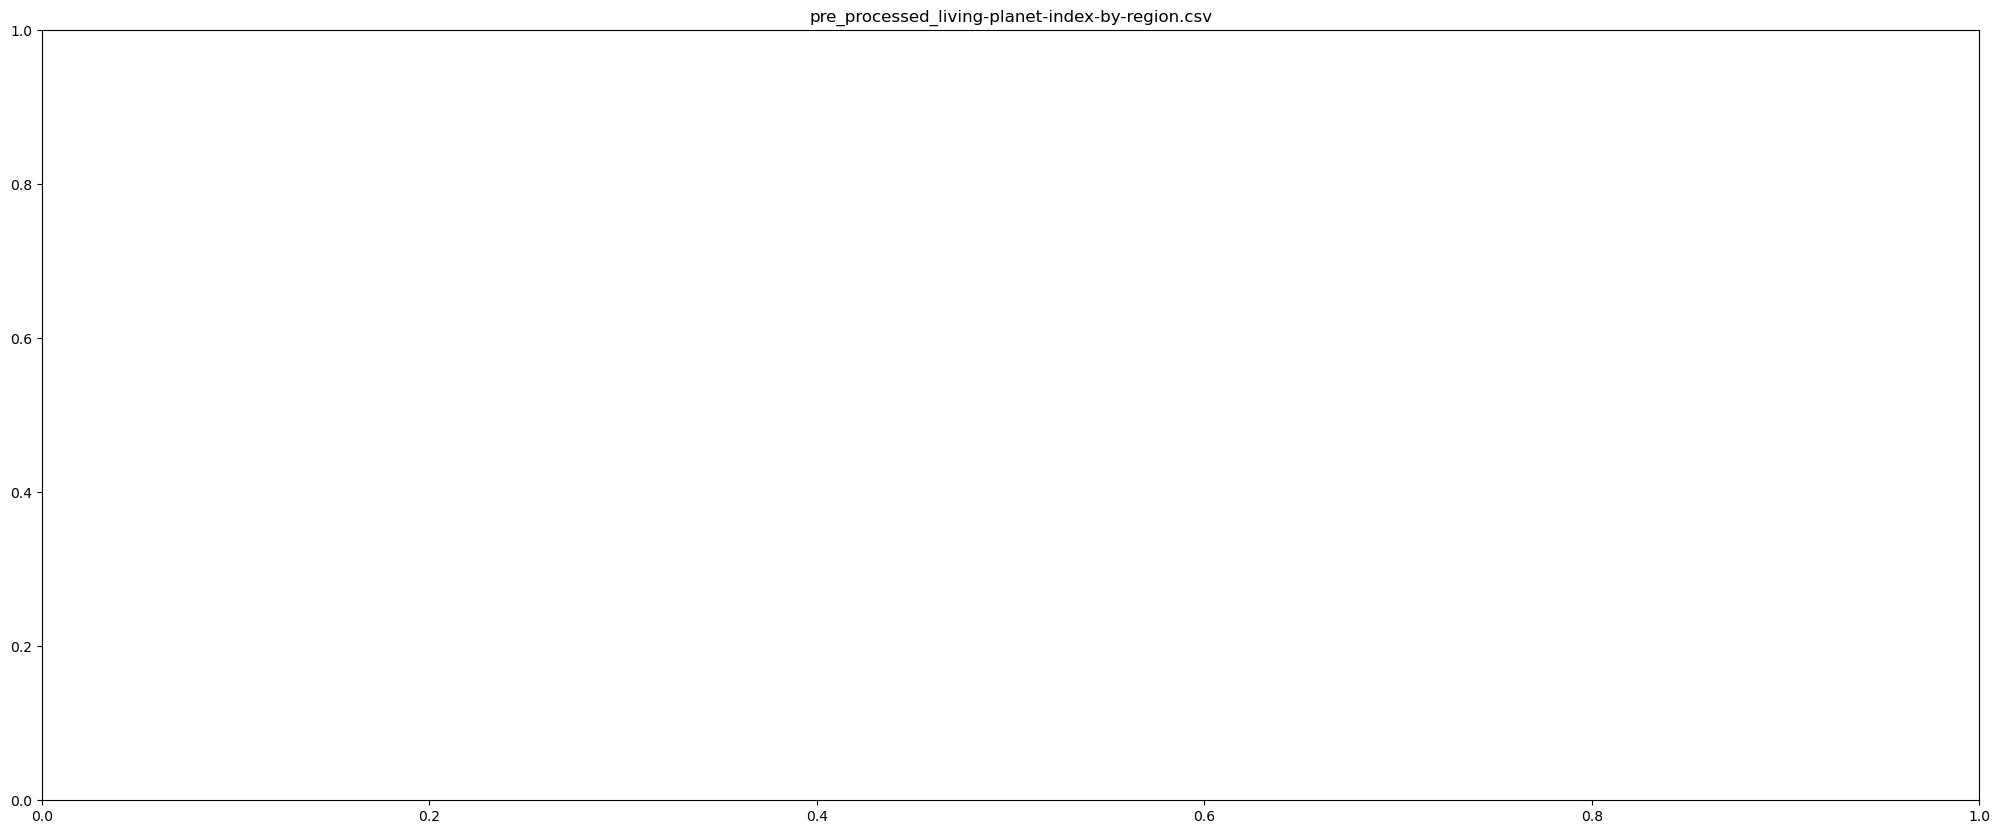

<Figure size 2500x1000 with 0 Axes>

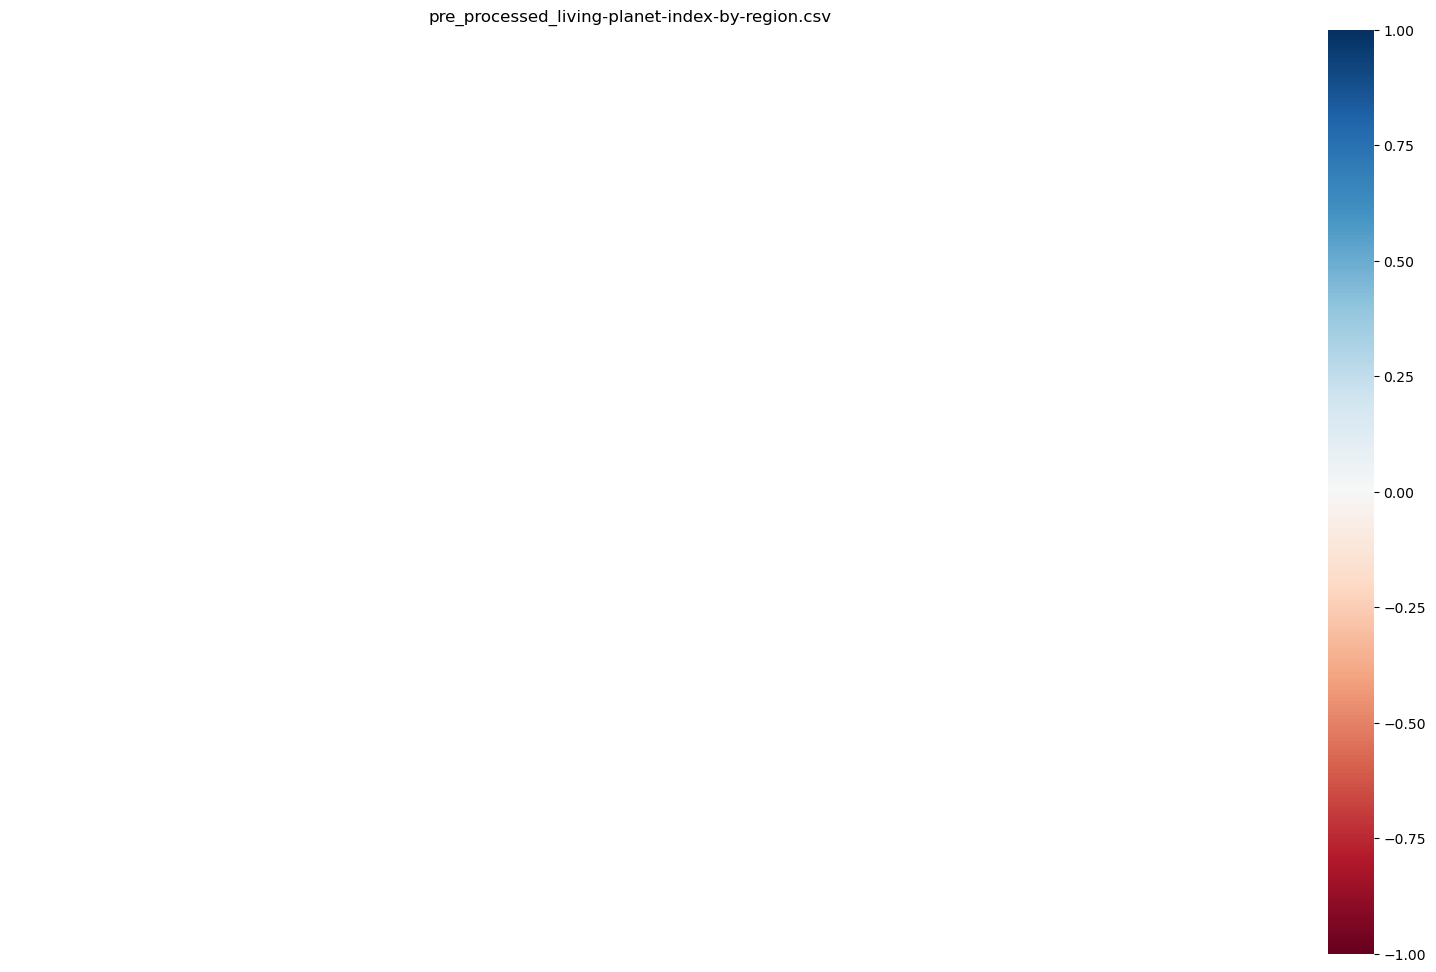

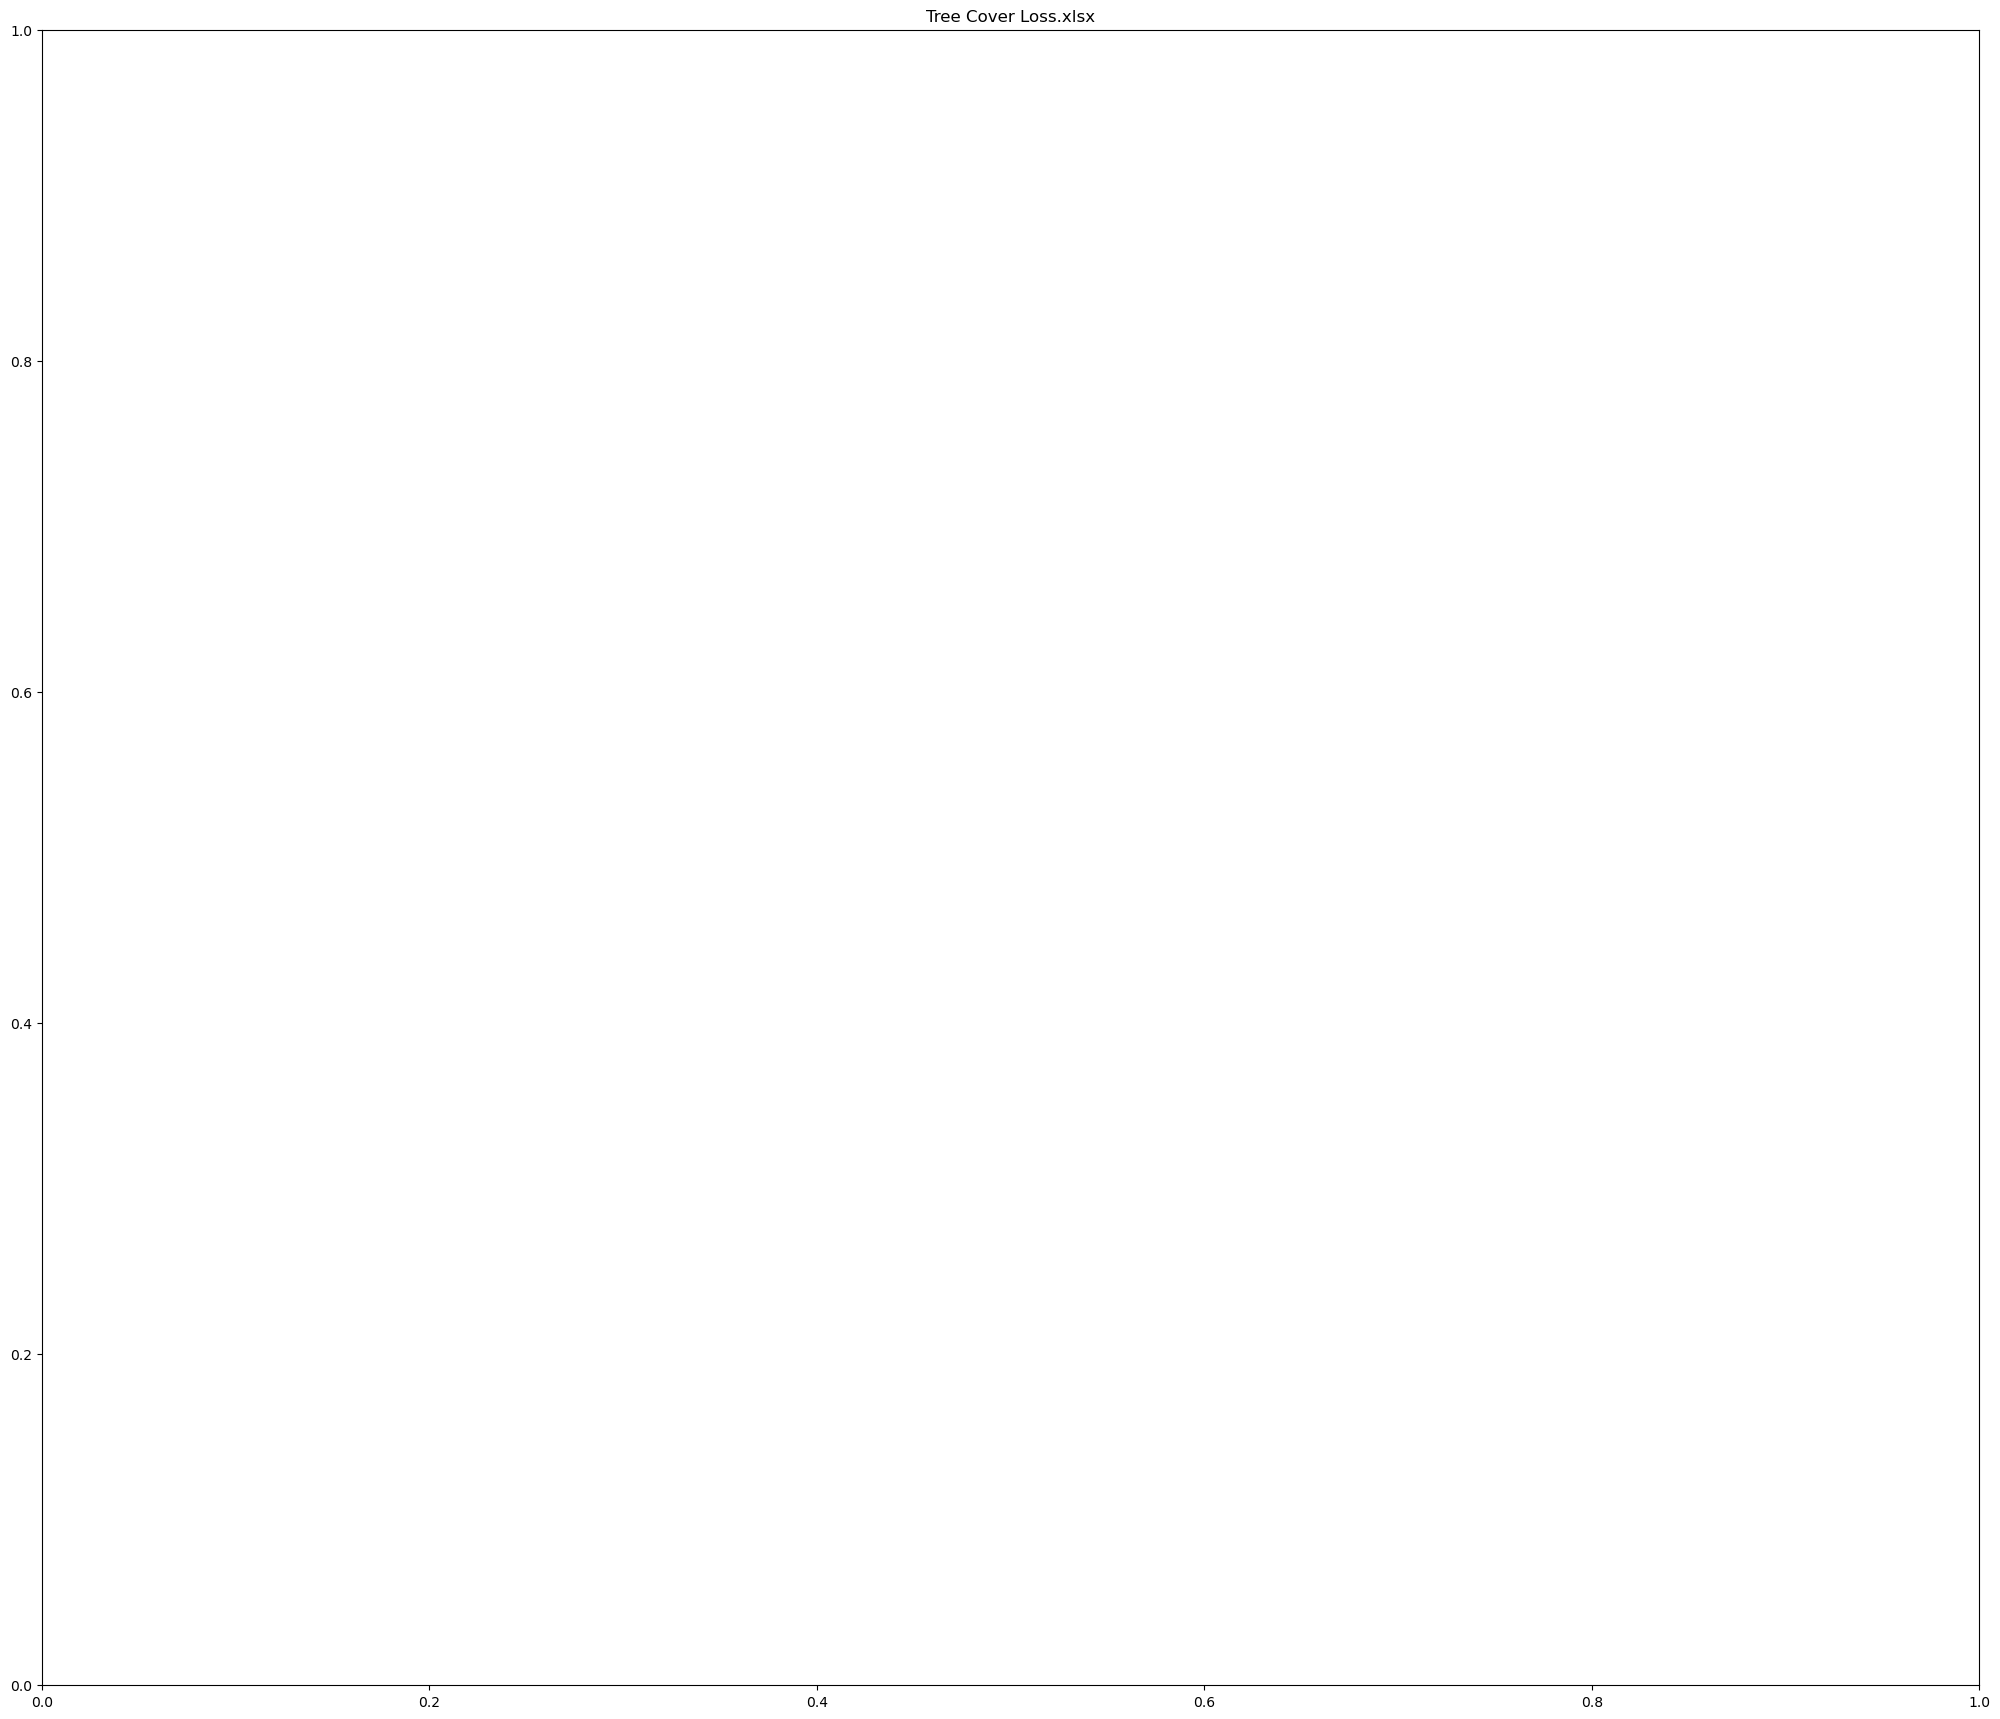

<Figure size 2500x2150 with 0 Axes>

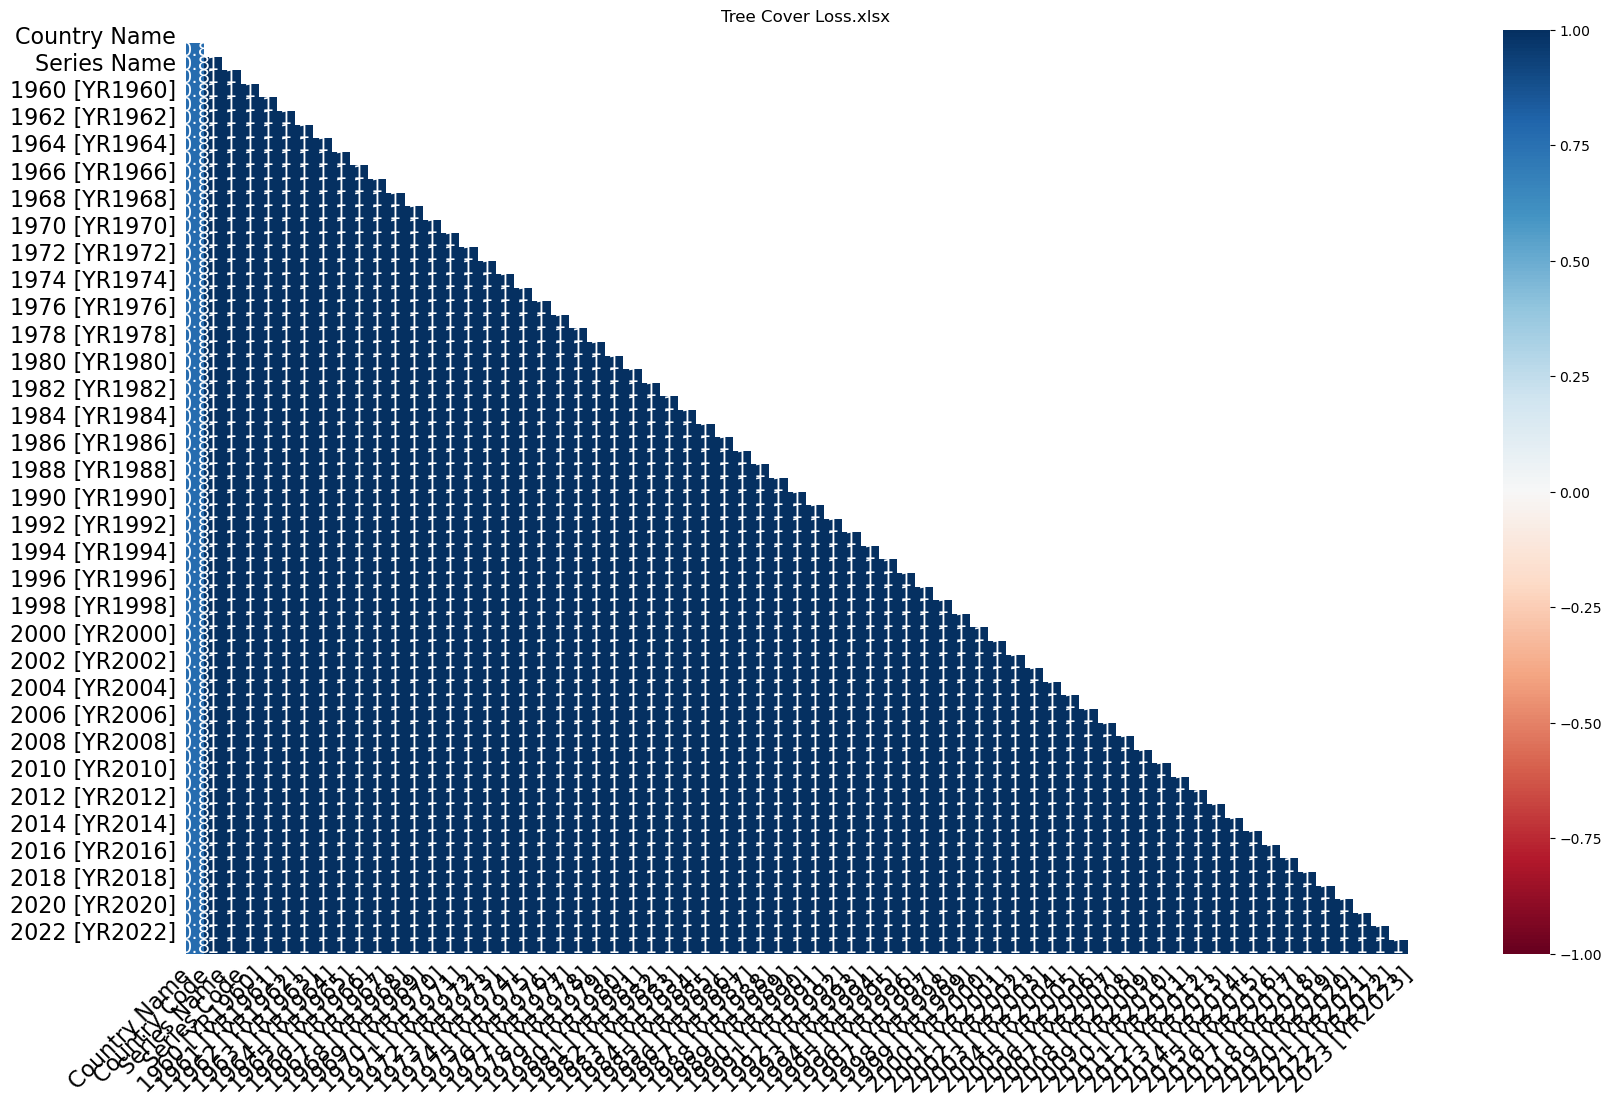

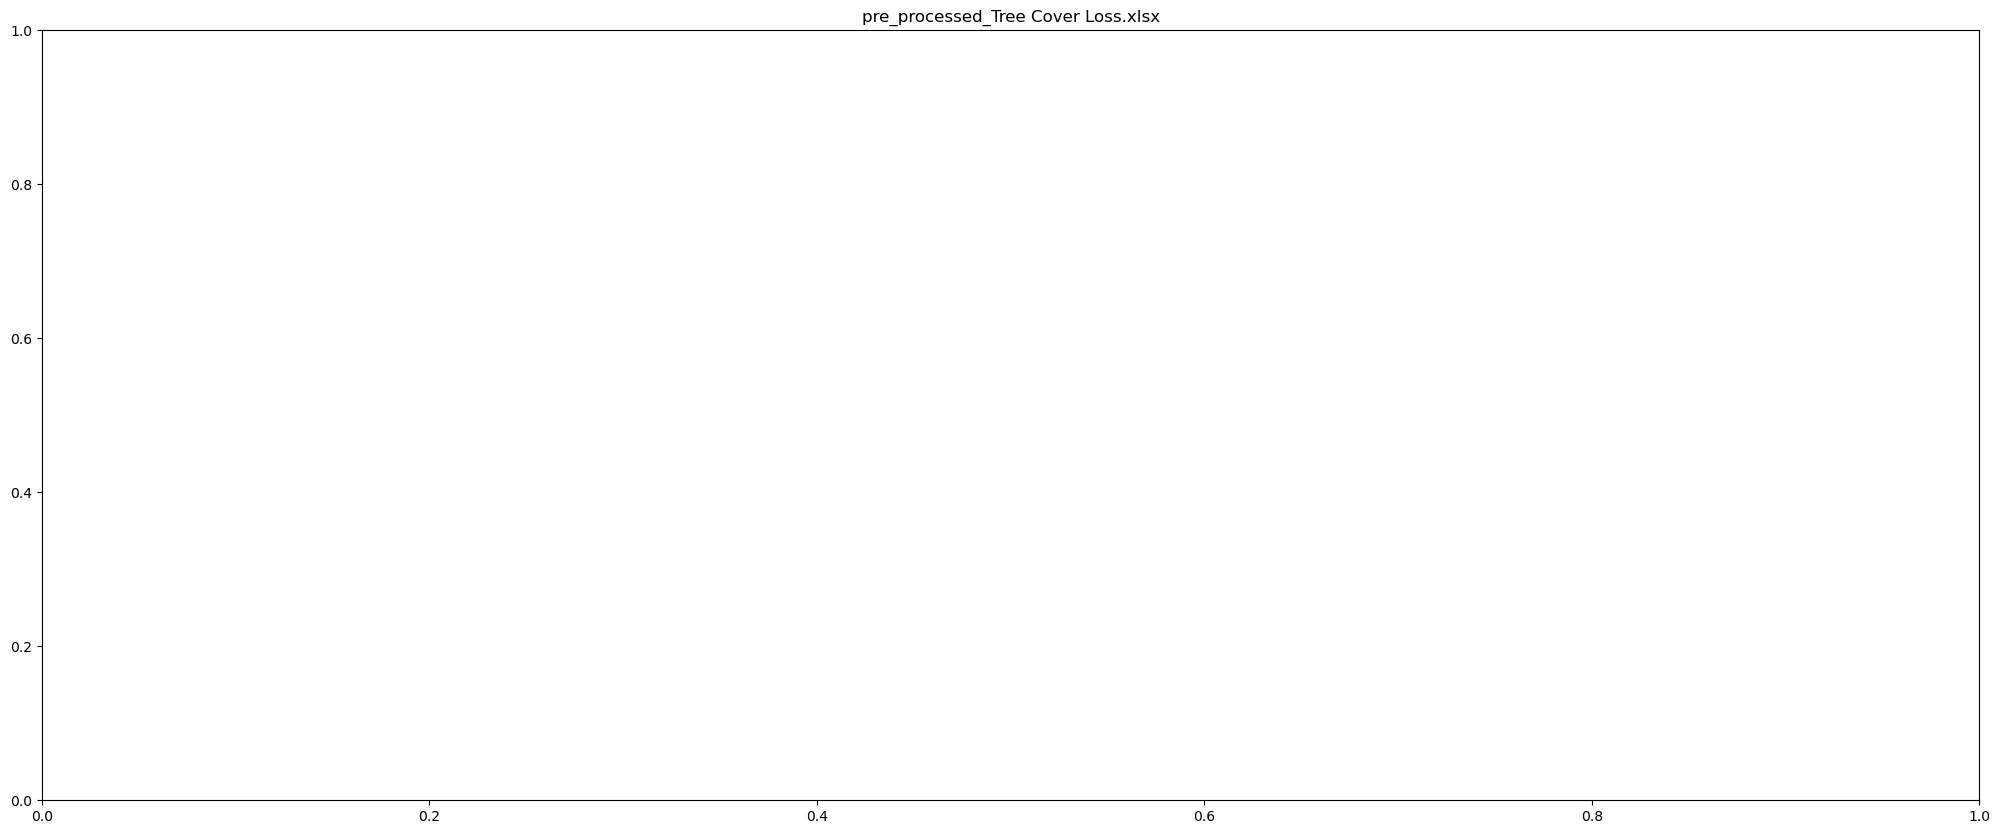

<Figure size 2500x1000 with 0 Axes>

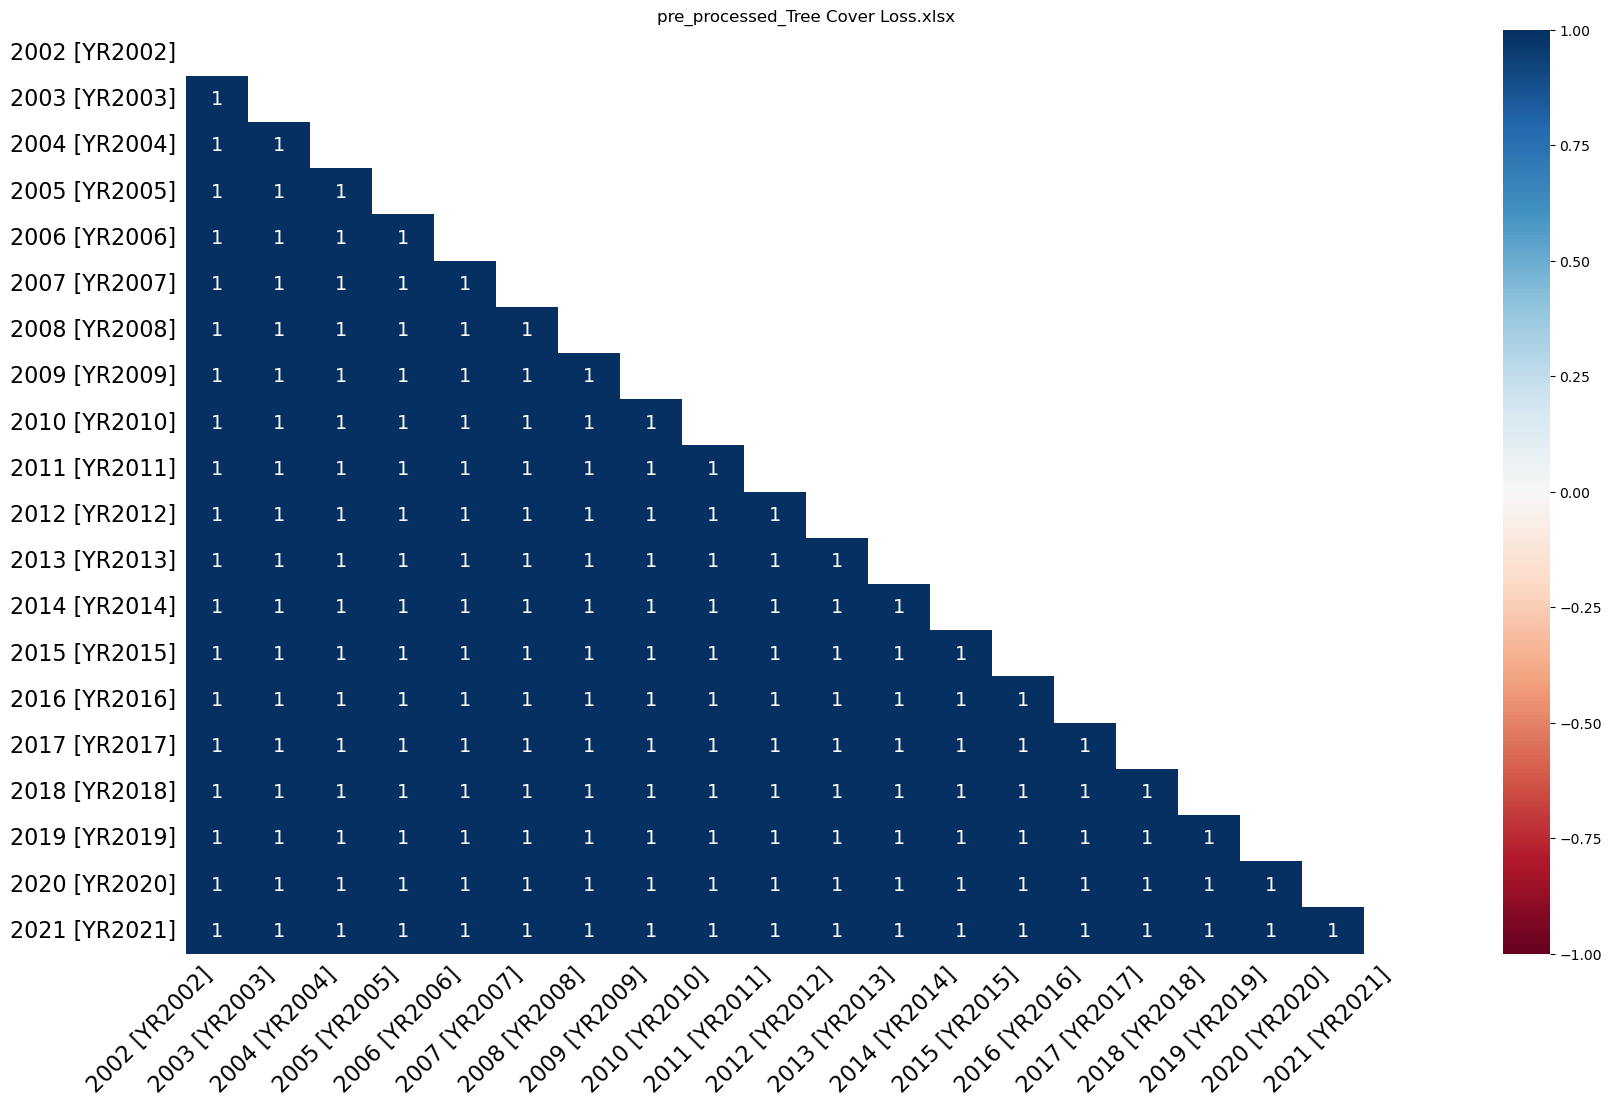

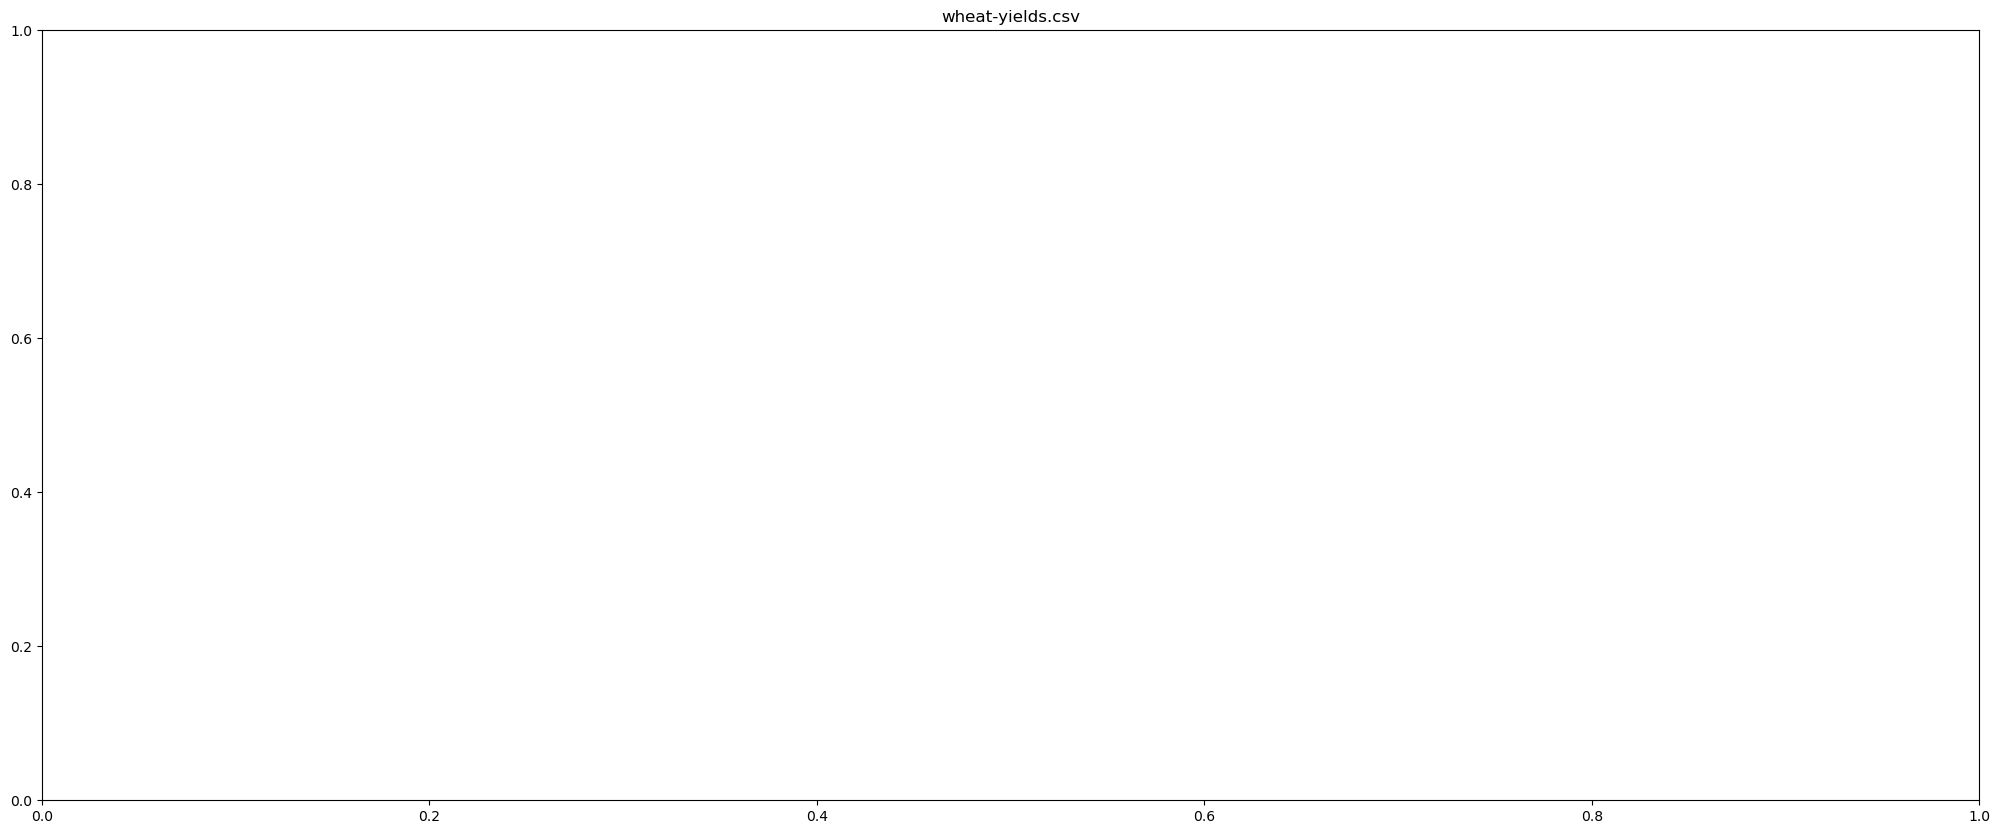

<Figure size 2500x1000 with 0 Axes>

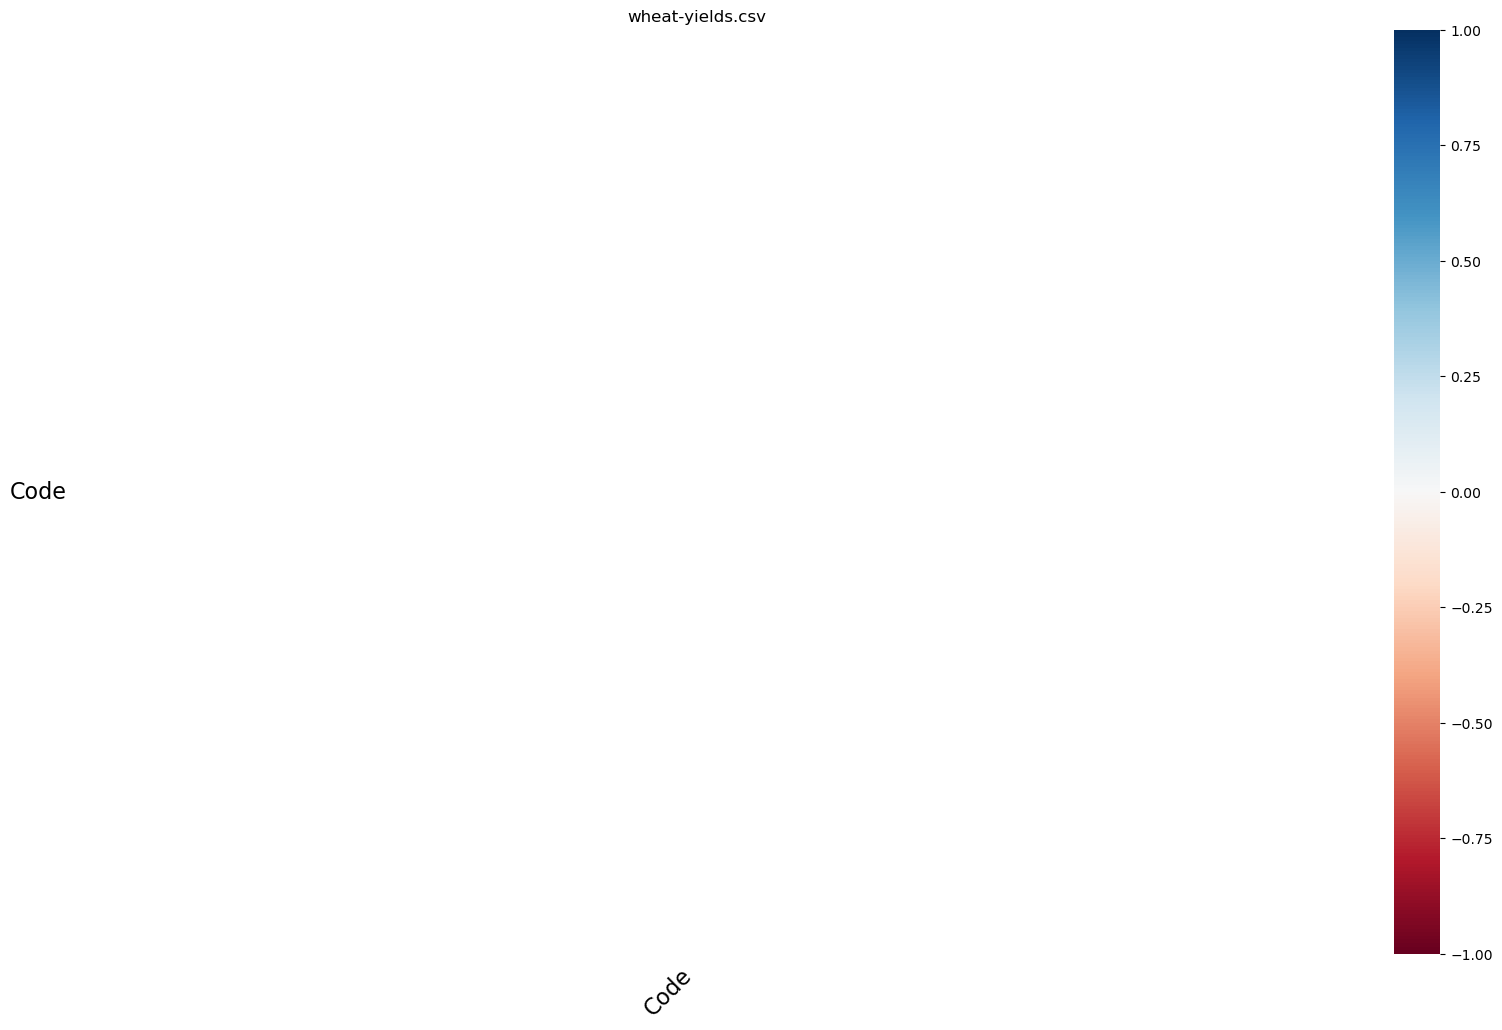

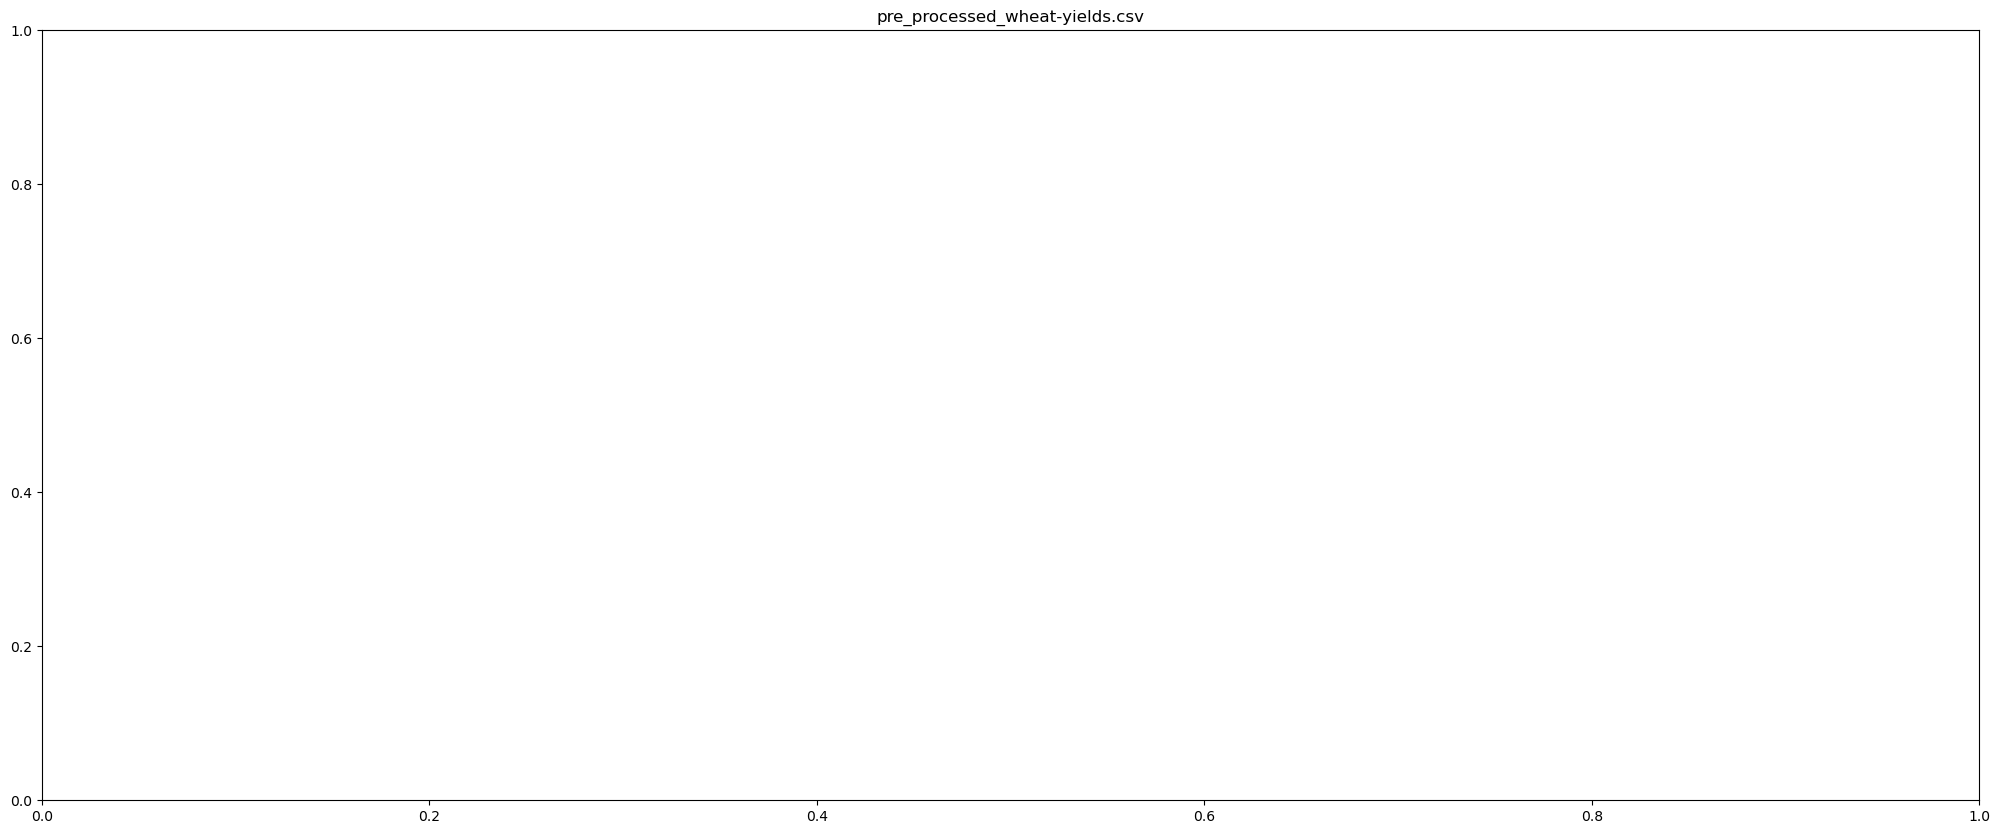

<Figure size 2500x1000 with 0 Axes>

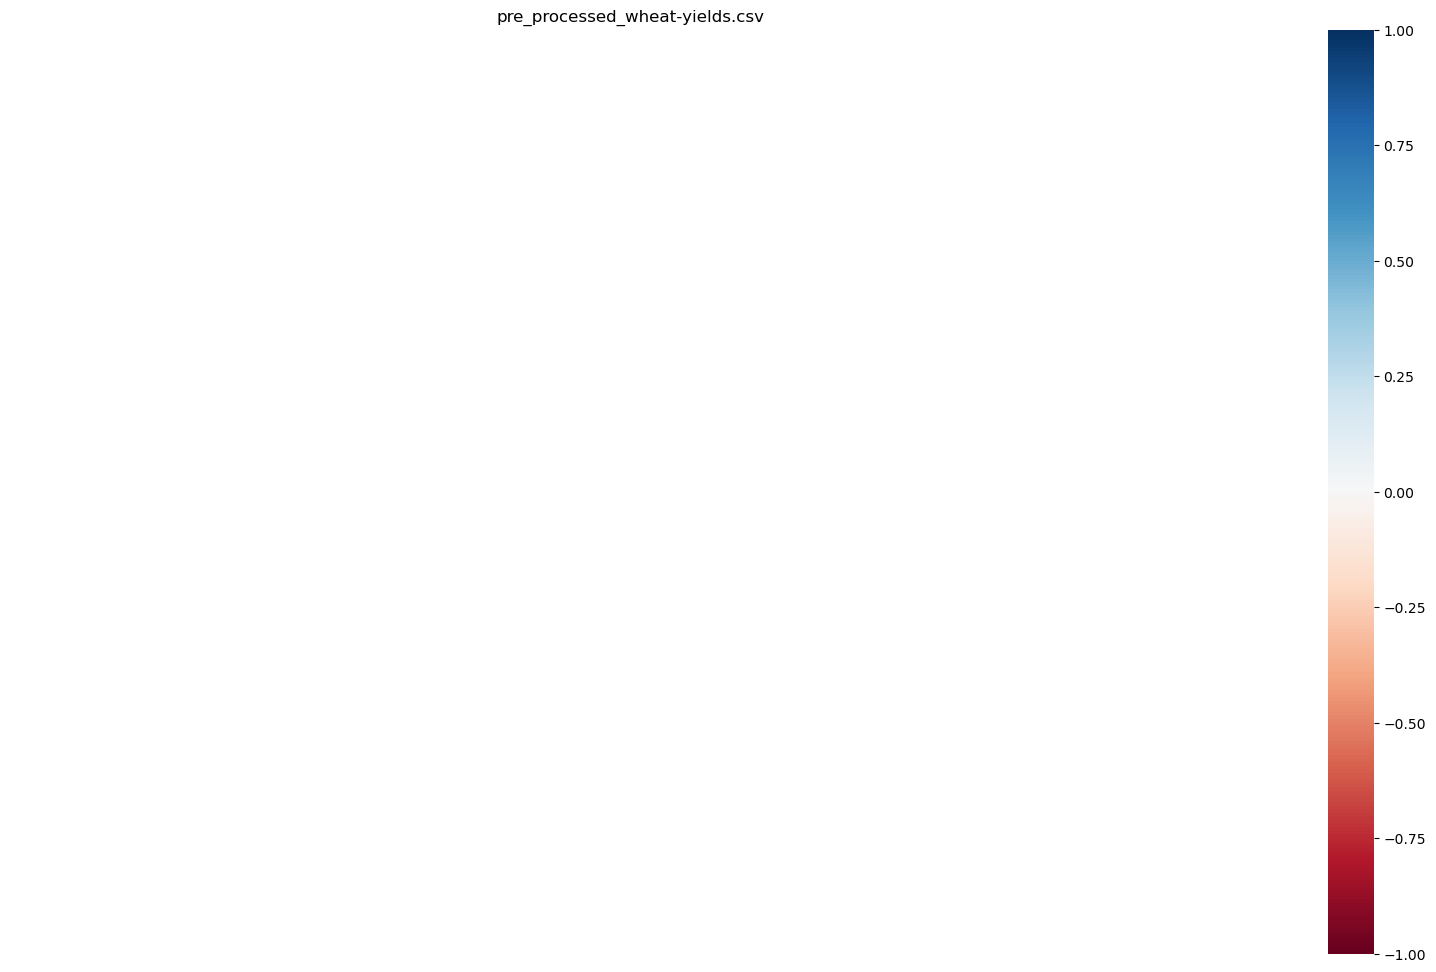

In [3]:
for dataset in os.listdir("Biodiversity"):
    if "xlsx" in dataset:
        df = pd.read_excel('Biodiversity/'+dataset, sheet_name='Data', header=0)
 
        
        
    else:
        df = pd.read_csv('Biodiversity/'+dataset)

    for type in [False,True]:
        if type == True:
            df = preprocess(df)
            dataset= "pre_processed_"+dataset
        plt.figure(figsize=(18,8))
        
        if "GHG emissions" in dataset:
            colours = ['red','#A29BC9' ] 
        
        if "Tree"  in dataset or "forest" in dataset or "Agricultural":
            colours = [ 'red','#86CE35'] 
        
        if "wheat" in dataset:
            colours = [ 'red','#E1C162'] 
        
        
   #     if "" in dataset:
   #         colours = ['#34495E', 'red'] 

   #     if "" in dataset:
   #         colours = ['#34495E', 'red'] 

    #    if "" in dataset:
    #        colours = ['#34495E', 'red'] 


        sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))
        
        plt.title(dataset)
        
        plt.savefig("visuals/heatmap/"+dataset+".png")
        plt.clf()
        plt.title(dataset)
        msno.bar(df)
        plt.savefig("visuals/bar/"+dataset+".png")
        plt.clf()
        plt.title(dataset)
        msno.dendrogram(df)
        plt.title(dataset)
        plt.savefig("visuals/tree/"+dataset+".png")
        plt.clf()
        
        msno.heatmap(df)
        plt.title(dataset)
        plt.savefig("visuals/corr/"+dataset+".png")
        df.to_csv("clean"+dataset)


In [4]:
#dataset = r'C:\Users\jester\Documents\GitHub\bio_diversity\bio_diversity-main\cleandeforestation-co2-trade-by-product.csv'
#if "xlsx" in dataset:
        df = pd.read_excel(dataset, sheet_name='Data', header=0)
#else:
#        df = pd.read_csv(dataset)

#df["netco2deforestation"] = df["cattle_meat"] + df["oilseed_products"] +df["other_crops"] +df["rice"] + df["veg_fruits_nuts"]+df["wheat"]+df["sugar"]+df["plant_fibres"]+df["other_meat_products"]+ df["other_cereals"]
#df["avgco2deforestation"] =df["netco2deforestation"]/10
#df.to_csv("clean_metric_deforestation-co2-trade-by-product.csv")

IndentationError: unexpected indent (919553089.py, line 3)

In [ ]:
# dataset = r'C:\Users\jester\Documents\GitHub\bio_diversity\bio_diversity-main\cleandeforestation-co2-trade-by-product.csv'
# if "xlsx" in dataset:
#         df = pd.read_excel(dataset, sheet_name='Data', header=0)
# else:
#         df = pd.read_csv(dataset)

# df.to_csv("clean_metric_deforestation-co2-trade-by-product.csv")